## PROBLEM STATEMENT
Preserving the financial health of customers is of great relevance for companies involved with the financial system. But you may wonder how to preserve the financial health of each client? well, the solution for this problem consists of calculating the probability of payment of each client according to some variables and doing some strategies to anticipate customer needs
In Taiwan, in February 2006, debt from credit cards and cash cards reached $268 billion USD.  More than half a million people were not able to repay their loans which caused crises. In order to avoid such problems, bank need to know which customer will default or not.


##  Data Definition (Default of Credit Card Clients)

Here's a brief version of what you'll find in the data


**ID-**-  ID of the client

**LIMIT_BAL-**-Amount of given credit in NT dollars (includes individual and family/supplementary credit).

**SEX-**-Gender of the consumer. (1=male, 2=female).

**EDUCATION**-Education level of the consumer (1= graduate school, 2= university, 3= high school, 4= others, 5= unknown, 6=unknown).

**MARRIAGE**-Marital Status (1=married, 2=single, 3=others).

**AGE**- Age in years.

**History of past payment. The repayment status in September, 2005** -Repayment status in September 2005, (-2 = No consumption, -1 = Pay Duly, 0= Revolving Credit, 1= Payment delay for one month, 2= payment delay for two months,…, 8 = payment delay for 8 months).

**History of past payment. The repayment status in August, 2005**

**History of past payment. The repayment status in July, 2005**

**History of past payment. The repayment status in June, 2005**

**History of past payment. The repayment status in May, 2005**

**History of past payment. The repayment status in April, 2005**

**Amount of bill statement in September, 2005 (NT dollar) -** -Amount of bill statement in September, 2005 (NT dollar).

**Amount of bill statement in September, 2005 (NT dollar) -** -Amount of bill statement in August, 2005 (NT dollar).

**Amount of bill statement in July, 2005 (NT dollar)-** -Amount of bill statement in July, 2005 (NT dollar).

**Amount of bill statement in June, 2005 (NT dollar)**- Amount of bill statement in June, 2005 (NT dollar).

**Amount of bill statement in May, 2005 (NT dollar)** -Amount of bill statement in May, 2005 (NT dollar).

**Amount of bill statement in April, 2005 (NT dollar)** -Amount of bill statement in April, 2005 (NT dollar).

**Amount of previous payment. Paid in September, 2005 (NT dollar)**-Amount of previous payment. Paid in September, 2005 (NT dollar).

**Amount of previous payment. Paid in August, 2005 (NT dollar)**-Amount of previous payment. Paid in August, 2005 (NT dollar).

**Amount of previous payment. Paid in July, 2005 (NT dollar)**-Amount of previous payment. Paid in July, 2005 (NT dollar).

**Amount of previous payment. Paid in June, 2005 (NT dollar)**-Amount of previous payment. Paid in June, 2005 (NT dollar).

**Amount of previous payment. Paid in May, 2005 (NT dollar)**-Amount of previous payment. Paid in May, 2005 (NT dollar).

**Amount of previous payment. Paid in April, 2005 (NT dollar**-Amount of previous payment. Paid in April, 2005 (NT dollar).

**default payment next month**-default payment next month-YES-1,NO-0

## Contents

1. **[Import Libraries](#import_lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - [Understand the Data](#read)
    - 2.2 - [Check the Data Type](#dtype)
    - 2.3 - [Missing Value Analysis and Duplicates](#null)
    - 2.4 - [Analysis](#ana)
    - 2.5 - [Outlier Analysis](#outliers)
3. **[Statistical Analysis](#Stats)**
    
4. **[Base Model](#base)**
5.Feature Engineering
6.Statistical Analysis
7. Model building
a) Logistic Model
b)Decision tree
c) Random Fores
d) KNN Model

<a id='import_lib'></a>
# 1. Import Libraries

In [824]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap   #RD

# import 'Seaborn' 
import seaborn as sns
import plotly.express as pe

# to suppress warnings 
from warnings import filterwarnings   #RD
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None  #RD

# display all rows of the dataframe
pd.options.display.max_rows = None    #RD
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format         #RD

# import train-test split 
from sklearn.model_selection import train_test_split  

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

#import pydotplus
#from IPython.display import Image
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# import the XGBoost function for classification
from xgboost import XGBClassifier

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Understand the Data

In [545]:
pf=pd.read_csv("default of credit card clients.csv")
pf.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [546]:
pf.columns = pf.iloc[0]
pf = pf[1:]

#From the above info, the data types are wrong according to our data definition

In [547]:
def convt(var):
    return float(var)

for i in pf.columns:
    pf[i]=pf[i].apply(convt)
    
pf["ID"]=pf["ID"].astype("int")

In [548]:
#Changing the column name
pf.rename(columns={'PAY_0':'History of   past payment. The repayment status in September, 2005*','PAY_2':'History of past payment. The repayment status in August, 2005*','PAY_3':'History of past payment. The repayment status in July, 2005*','PAY_4':'History of past payment. The repayment status in June, 2005*','PAY_5':'History of past payment. The repayment status in May, 2005*','PAY_6':'History of past payment. The repayment status in April, 2005*','BILL_AMT1':'Amount of bill   statement in September, 2005 (NT dollar)','BILL_AMT2':'Amount of bill   statement in August, 2005 (NT dollar)','BILL_AMT3':'Amount of bill   statement in July, 2005 (NT dollar)','BILL_AMT4':'Amount of bill   statement in June, 2005 (NT dollar)','BILL_AMT5':'Amount of bill   statement in May, 2005 (NT dollar)','BILL_AMT6':'Amount of bill   statement in April, 2005 (NT dollar)','PAY_AMT1':'Amount of   previous payment. Paid in September, 2005 (NT dollar)','PAY_AMT2':'Amount of   previous payment. Paid in August, 2005 (NT dollar)','PAY_AMT3':'Amount of   previous payment. Paid in July, 2005 (NT dollar)','PAY_AMT4':'Amount of   previous payment. Paid in June, 2005 (NT dollar)','PAY_AMT5':'Amount of   previous payment. Paid in May, 2005 (NT dollar)','PAY_AMT6':'Amount of   previous payment. Paid in April, 2005 (NT dollar)'}, inplace=True)

In [549]:
pf.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,"History of past payment. The repayment status in September, 2005*","History of past payment. The repayment status in August, 2005*","History of past payment. The repayment status in July, 2005*","History of past payment. The repayment status in June, 2005*","History of past payment. The repayment status in May, 2005*","History of past payment. The repayment status in April, 2005*","Amount of bill statement in September, 2005 (NT dollar)","Amount of bill statement in August, 2005 (NT dollar)","Amount of bill statement in July, 2005 (NT dollar)","Amount of bill statement in June, 2005 (NT dollar)","Amount of bill statement in May, 2005 (NT dollar)","Amount of bill statement in April, 2005 (NT dollar)","Amount of previous payment. Paid in September, 2005 (NT dollar)","Amount of previous payment. Paid in August, 2005 (NT dollar)","Amount of previous payment. Paid in July, 2005 (NT dollar)","Amount of previous payment. Paid in June, 2005 (NT dollar)","Amount of previous payment. Paid in May, 2005 (NT dollar)","Amount of previous payment. Paid in April, 2005 (NT dollar)",default payment next month
1,1,20000.000000,2.000000,2.000000,1.000000,24.000000,2.000000,2.000000,-1.000000,-1.000000,-2.000000,-2.000000,3913.000000,3102.000000,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1.000000
2,2,120000.000000,2.000000,2.000000,2.000000,26.000000,-1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,2682.000000,1725.000000,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1.000000
3,3,90000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29239.000000,14027.000000,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0.000000
4,4,50000.000000,2.000000,2.000000,1.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46990.000000,48233.000000,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0.000000
5,5,50000.000000,1.000000,2.000000,1.000000,57.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,8617.000000,5670.000000,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0.000000


<a id="dtype"></a>
## 2.2 Check the Data Type

In [550]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   ID                                                                   30000 non-null  int32  
 1   LIMIT_BAL                                                            30000 non-null  float64
 2   SEX                                                                  30000 non-null  float64
 3   EDUCATION                                                            30000 non-null  float64
 4   MARRIAGE                                                             30000 non-null  float64
 5   AGE                                                                  30000 non-null  float64
 6   History of   past payment. The repayment status in September, 2005*  30000 non-null  float64
 7   Hist

In [551]:
#Changing data type of independent variables
pf["SEX"]=pf["SEX"].astype("int")
pf["EDUCATION"]=pf["EDUCATION"].astype("int")
pf["MARRIAGE"]=pf["MARRIAGE"].astype("int")
pf["History of   past payment. The repayment status in September, 2005*"]=pf["History of   past payment. The repayment status in September, 2005*"].astype("int")
pf["History of past payment. The repayment status in August, 2005*"]=pf["History of past payment. The repayment status in August, 2005*"].astype("int")
pf["History of past payment. The repayment status in July, 2005*"]=pf["History of past payment. The repayment status in July, 2005*"].astype("int")
pf["History of past payment. The repayment status in June, 2005*"]=pf["History of past payment. The repayment status in June, 2005*"].astype("int")
pf["History of past payment. The repayment status in May, 2005*"]=pf["History of past payment. The repayment status in May, 2005*"].astype("int")
pf["History of past payment. The repayment status in April, 2005*"]=pf["History of past payment. The repayment status in April, 2005*"].astype("int")


In [552]:
#Changing data type of independent variables
pf["SEX"]=pf["SEX"].astype("object")
pf["EDUCATION"]=pf["EDUCATION"].astype("object")
pf["MARRIAGE"]=pf["MARRIAGE"].astype("object")
pf["History of   past payment. The repayment status in September, 2005*"]=pf["History of   past payment. The repayment status in September, 2005*"].astype("object")
pf["History of past payment. The repayment status in August, 2005*"]=pf["History of past payment. The repayment status in August, 2005*"].astype("object")
pf["History of past payment. The repayment status in July, 2005*"]=pf["History of past payment. The repayment status in July, 2005*"].astype("object")
pf["History of past payment. The repayment status in June, 2005*"]=pf["History of past payment. The repayment status in June, 2005*"].astype("object")
pf["History of past payment. The repayment status in May, 2005*"]=pf["History of past payment. The repayment status in May, 2005*"].astype("object")
pf["History of past payment. The repayment status in April, 2005*"]=pf["History of past payment. The repayment status in April, 2005*"].astype("object")


In [553]:
pf["AGE"]=pf["AGE"].astype("int")

In [554]:
#data type of target variable
pf["default payment next month"]=pf["default payment next month"].astype("int")

In [555]:
pf.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,"History of past payment. The repayment status in September, 2005*","History of past payment. The repayment status in August, 2005*","History of past payment. The repayment status in July, 2005*","History of past payment. The repayment status in June, 2005*","History of past payment. The repayment status in May, 2005*","History of past payment. The repayment status in April, 2005*","Amount of bill statement in September, 2005 (NT dollar)","Amount of bill statement in August, 2005 (NT dollar)","Amount of bill statement in July, 2005 (NT dollar)","Amount of bill statement in June, 2005 (NT dollar)","Amount of bill statement in May, 2005 (NT dollar)","Amount of bill statement in April, 2005 (NT dollar)","Amount of previous payment. Paid in September, 2005 (NT dollar)","Amount of previous payment. Paid in August, 2005 (NT dollar)","Amount of previous payment. Paid in July, 2005 (NT dollar)","Amount of previous payment. Paid in June, 2005 (NT dollar)","Amount of previous payment. Paid in May, 2005 (NT dollar)","Amount of previous payment. Paid in April, 2005 (NT dollar)",default payment next month
1,1,20000.000000,2,2,1,24,2,2,-1,-1,-2,-2,3913.000000,3102.000000,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1
2,2,120000.000000,2,2,2,26,-1,2,0,0,0,2,2682.000000,1725.000000,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1
3,3,90000.000000,2,2,2,34,0,0,0,0,0,0,29239.000000,14027.000000,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0
4,4,50000.000000,2,2,1,37,0,0,0,0,0,0,46990.000000,48233.000000,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0
5,5,50000.000000,1,2,1,57,-1,0,-1,0,0,0,8617.000000,5670.000000,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0


In [556]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   ID                                                                   30000 non-null  int32  
 1   LIMIT_BAL                                                            30000 non-null  float64
 2   SEX                                                                  30000 non-null  object 
 3   EDUCATION                                                            30000 non-null  object 
 4   MARRIAGE                                                             30000 non-null  object 
 5   AGE                                                                  30000 non-null  int32  
 6   History of   past payment. The repayment status in September, 2005*  30000 non-null  object 
 7   Hist

#Hence, changed the data types of the variables

<a id="null"></a>
## 2.3  Missing Value Analysis and Duplicates

In [557]:
#checking null value
pf.isnull().sum()

0
ID                                                                     0
LIMIT_BAL                                                              0
SEX                                                                    0
EDUCATION                                                              0
MARRIAGE                                                               0
AGE                                                                    0
History of   past payment. The repayment status in September, 2005*    0
History of past payment. The repayment status in August, 2005*         0
History of past payment. The repayment status in July, 2005*           0
History of past payment. The repayment status in June, 2005*           0
History of past payment. The repayment status in May, 2005*            0
History of past payment. The repayment status in April, 2005*          0
Amount of bill   statement in September, 2005 (NT dollar)              0
Amount of bill   statement in August, 2005 (NT do

#We observe that there are no missing values

## Duplicate Values

In [558]:
pf[pf.duplicated()==True].count()

0
ID                                                                     0
LIMIT_BAL                                                              0
SEX                                                                    0
EDUCATION                                                              0
MARRIAGE                                                               0
AGE                                                                    0
History of   past payment. The repayment status in September, 2005*    0
History of past payment. The repayment status in August, 2005*         0
History of past payment. The repayment status in July, 2005*           0
History of past payment. The repayment status in June, 2005*           0
History of past payment. The repayment status in May, 2005*            0
History of past payment. The repayment status in April, 2005*          0
Amount of bill   statement in September, 2005 (NT dollar)              0
Amount of bill   statement in August, 2005 (NT do

#We observe that there are no duplicate values

<a id="ana"></a>
## 2.4 Analysis

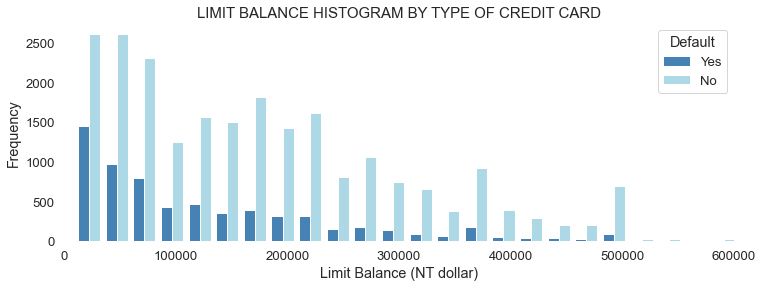

In [559]:
x1 = list(pf[pf['default payment next month'] == 1]['LIMIT_BAL'])
x2 = list(pf[pf['default payment next month'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40,color=['steelblue', 'lightblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', SIZE=15)
plt.box(False)
plt.savefig('defaultbylimitbalnace');

In [560]:
pf["SEX"].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [561]:
#let's Visualize

<Figure size 432x432 with 0 Axes>

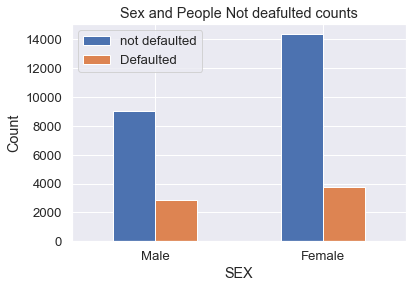

In [562]:
target_count = pf.groupby(['SEX','default payment next month']).SEX.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=False)
plt.xticks([0,1],labels=['Male','Female'],rotation=0)
plt.ylabel('Count')
plt.legend(['not defaulted', 'Defaulted'])
plt.title("Sex and People Not deafulted counts")
plt.savefig('defaultbysex')
plt.show()

In [563]:
pd.crosstab(pf['SEX'],pf['default payment next month'])

default payment next month,0,1
SEX,,
1,9015,2873
2,14349,3763


In [564]:
pf.groupby(['SEX'])['default payment next month'].value_counts()/len(pf)*100

SEX  default payment next month
1    0                            30.050000
     1                             9.576667
2    0                            47.830000
     1                            12.543333
Name: default payment next month, dtype: float64

In [565]:
#1 in SEX represents male,2 represents Female
#Though the proportion of male and female is unequal, the default rate of male is almost same as of female

In [566]:
pf["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [567]:
#Replacing "6" with"5" as they both represents "Unknown" value (from the variables definition)
pf.EDUCATION.replace(to_replace=6,value=5,inplace=True)

In [568]:
#according to our data definiton, label 0 is not defined.
#let's impute the label 0 with label 5

In [569]:
pf.EDUCATION.replace(to_replace=0,value=5,inplace=True)

In [570]:
pf.groupby(['EDUCATION'])['default payment next month'].value_counts()/len(pf)*100

EDUCATION  default payment next month
1          0                            28.496667
           1                             6.786667
2          0                            35.666667
           1                            11.100000
3          0                            12.266667
           1                             4.123333
4          0                             0.386667
           1                             0.023333
5          0                             1.063333
           1                             0.086667
Name: default payment next month, dtype: float64

In [571]:
pd.crosstab(pf['EDUCATION'],pf['default payment next month'])

default payment next month,0,1
EDUCATION,,
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,319,26


In [572]:
pf["EDUCATION"]=pf["EDUCATION"].astype("object")

In [573]:
pf['EDUCATION'].dtype

dtype('O')

<Figure size 864x576 with 0 Axes>

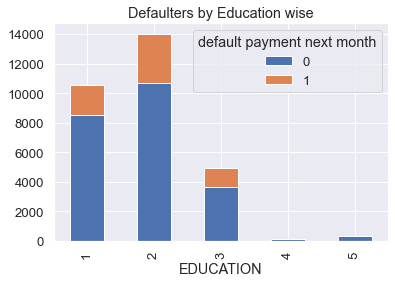

In [574]:
plt.figure(figsize=(12,8))
pd.crosstab(pf['EDUCATION'],pf['default payment next month']).plot.bar(stacked=True)
plt.title('Defaulters by Education wise')
plt.savefig('Defaulters by Education wise')
plt.show()

In [575]:
#Education-2, represents university level and 1 represents graduate school level.
#we observe that, Number of defaulters are more in education level 2 as the count of education level 2is also high.

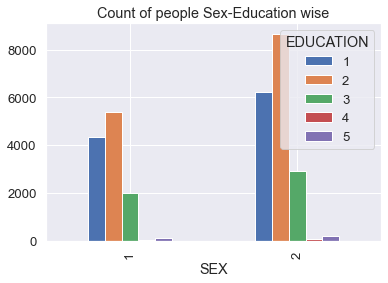

In [576]:
pd.pivot_table(pf,index='SEX',columns='EDUCATION',values='default payment next month',aggfunc='count').plot(kind='bar')
plt.title('Count of people Sex-Education wise')
plt.savefig('Count of people Sex-Education wise')
plt.show()

In [577]:
pf["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [578]:
pd.crosstab(pf['MARRIAGE'],pf['default payment next month'])

default payment next month,0,1
MARRIAGE,,
0,49,5
1,10453,3206
2,12623,3341
3,239,84


#from the above cross-tab, the label 0 is not defined according to the data definiton
#let's replace the label with mode of marriage i.e., with label 2

In [579]:
pf.MARRIAGE.replace(to_replace=0,value=2,inplace=True)

In [580]:
pf["MARRIAGE"]=pf["MARRIAGE"].astype("object")
pf['MARRIAGE'].dtype

dtype('O')

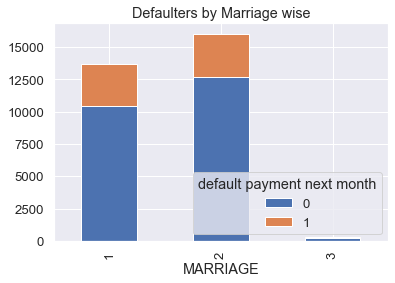

In [581]:
pd.crosstab(pf['MARRIAGE'],pf['default payment next month']).plot.bar(stacked=True)
plt.title('Defaulters by Marriage wise')
plt.show()

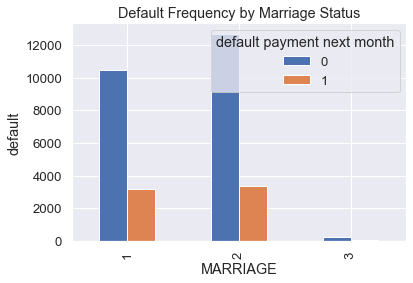

In [582]:
pd.crosstab(pf['MARRIAGE'],pf['default payment next month']).plot(kind='bar')
plt.title('Default Frequency by Marriage Status')
plt.xlabel('MARRIAGE')
plt.ylabel('default')
plt.show()

In [583]:
#label 1 represents married,2-single and 3 represents 'others'
#Even though the count of singles is more than married count, the proportion of defaulters are almost same

In [584]:
pf["History of   past payment. The repayment status in September, 2005*"].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: History of   past payment. The repayment status in September, 2005*, dtype: int64

In [585]:
df1 = pf['History of   past payment. The repayment status in September, 2005*'].value_counts().reset_index()
df1.columns = ['History of   past payment. The repayment status in September, 2005*', 'No of people']

fig3 = pe.pie(df1, values = 'No of people', names = 'History of   past payment. The repayment status in September, 2005*',color_discrete_sequence =  pe.colors.sequential.Plasma,
             title = 'No of people in repayment status of month september 2005')
fig3.show()

In [586]:
pf["History of past payment. The repayment status in August, 2005*"].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: History of past payment. The repayment status in August, 2005*, dtype: int64

In [587]:
df2 = pf['History of past payment. The repayment status in August, 2005*'].value_counts().reset_index()
df2.columns = ['History of past payment. The repayment status in August, 2005*', 'No of people']

fig4 = pe.pie(df2, values = 'No of people', names = 'History of past payment. The repayment status in August, 2005*',color_discrete_sequence =  pe.colors.sequential.Plasma,
             title = 'No of people in repayment status of month August 2005')
fig4.show()

In [588]:
pf["History of past payment. The repayment status in July, 2005*"].value_counts()

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: History of past payment. The repayment status in July, 2005*, dtype: int64

In [589]:
df3 = pf['History of past payment. The repayment status in July, 2005*'].value_counts().reset_index()
df3.columns = ['History of past payment. The repayment status in July, 2005*', 'No of people']

fig5 = pe.pie(df3, values = 'No of people', names = 'History of past payment. The repayment status in July, 2005*',color_discrete_sequence =  pe.colors.sequential.Plasma,
             title = 'No of people in repayment status of month July 2005')
fig5.show()

In [590]:
pf["History of past payment. The repayment status in June, 2005*"].value_counts()

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: History of past payment. The repayment status in June, 2005*, dtype: int64

In [591]:
df4 = pf['History of past payment. The repayment status in June, 2005*'].value_counts().reset_index()
df4.columns = ['History of past payment. The repayment status in June, 2005*', 'No of people']

fig6 = pe.pie(df4, values = 'No of people', names = 'History of past payment. The repayment status in June, 2005*',color_discrete_sequence =  pe.colors.sequential.Plasma,
             title = 'No of people in repayment status of month June 2005')
fig6.show()

In [592]:
pf["History of past payment. The repayment status in May, 2005*"].value_counts()

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: History of past payment. The repayment status in May, 2005*, dtype: int64

In [593]:
df5 = pf['History of past payment. The repayment status in May, 2005*'].value_counts().reset_index()
df5.columns = ['History of past payment. The repayment status in May, 2005*', 'No of people']

fig7 = pe.pie(df5, values = 'No of people', names = 'History of past payment. The repayment status in May, 2005*',color_discrete_sequence =  pe.colors.sequential.Plasma,
             title = 'No of people in repayment status of month May 2005')
fig7.show()

In [594]:
pf["History of past payment. The repayment status in April, 2005*"].value_counts()

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: History of past payment. The repayment status in April, 2005*, dtype: int64

In [595]:
df6 = pf['History of past payment. The repayment status in April, 2005*'].value_counts().reset_index()
df6.columns = ['History of past payment. The repayment status in April, 2005*', 'No of people']

fig8 = pe.pie(df6, values = 'No of people', names = 'History of past payment. The repayment status in April, 2005*',color_discrete_sequence =  pe.colors.sequential.Plasma,
             title = 'No of people in repayment status of month April 2005')
fig8.show()

In [596]:
#Setting ID as index, instead of dropping the ID column to refer it as a serial number
pf.set_index(["ID"], inplace = True, drop = True)
pf.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,"History of past payment. The repayment status in September, 2005*","History of past payment. The repayment status in August, 2005*","History of past payment. The repayment status in July, 2005*","History of past payment. The repayment status in June, 2005*","History of past payment. The repayment status in May, 2005*","History of past payment. The repayment status in April, 2005*","Amount of bill statement in September, 2005 (NT dollar)","Amount of bill statement in August, 2005 (NT dollar)","Amount of bill statement in July, 2005 (NT dollar)","Amount of bill statement in June, 2005 (NT dollar)","Amount of bill statement in May, 2005 (NT dollar)","Amount of bill statement in April, 2005 (NT dollar)","Amount of previous payment. Paid in September, 2005 (NT dollar)","Amount of previous payment. Paid in August, 2005 (NT dollar)","Amount of previous payment. Paid in July, 2005 (NT dollar)","Amount of previous payment. Paid in June, 2005 (NT dollar)","Amount of previous payment. Paid in May, 2005 (NT dollar)","Amount of previous payment. Paid in April, 2005 (NT dollar)",default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000.000000,2,2,1,24,2,2,-1,-1,-2,-2,3913.000000,3102.000000,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1
2,120000.000000,2,2,2,26,-1,2,0,0,0,2,2682.000000,1725.000000,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1
3,90000.000000,2,2,2,34,0,0,0,0,0,0,29239.000000,14027.000000,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0
4,50000.000000,2,2,1,37,0,0,0,0,0,0,46990.000000,48233.000000,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0
5,50000.000000,1,2,1,57,-1,0,-1,0,0,0,8617.000000,5670.000000,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0


In [597]:
pf.dtypes

0
LIMIT_BAL                                                              float64
SEX                                                                     object
EDUCATION                                                               object
MARRIAGE                                                                object
AGE                                                                      int32
History of   past payment. The repayment status in September, 2005*     object
History of past payment. The repayment status in August, 2005*          object
History of past payment. The repayment status in July, 2005*            object
History of past payment. The repayment status in June, 2005*            object
History of past payment. The repayment status in May, 2005*             object
History of past payment. The repayment status in April, 2005*           object
Amount of bill   statement in September, 2005 (NT dollar)              float64
Amount of bill   statement in August, 2005 (NT dol

In [598]:
pf.describe()

,LIMIT_BAL,AGE,"Amount of bill statement in September, 2005 (NT dollar)","Amount of bill statement in August, 2005 (NT dollar)","Amount of bill statement in July, 2005 (NT dollar)","Amount of bill statement in June, 2005 (NT dollar)","Amount of bill statement in May, 2005 (NT dollar)","Amount of bill statement in April, 2005 (NT dollar)","Amount of previous payment. Paid in September, 2005 (NT dollar)","Amount of previous payment. Paid in August, 2005 (NT dollar)","Amount of previous payment. Paid in July, 2005 (NT dollar)","Amount of previous payment. Paid in June, 2005 (NT dollar)","Amount of previous payment. Paid in May, 2005 (NT dollar)","Amount of previous payment. Paid in April, 2005 (NT dollar)",default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,47013.154800,43262.948967,40311.400967,38871.760400,5663.580500,5921.163500,5225.681500,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,9.217904,73635.860576,71173.768783,69349.387427,64332.856134,60797.155770,59554.107537,16563.280354,23040.870402,17606.961470,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,21.000000,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2666.250000,2326.750000,1763.000000,1256.000000,1000.000000,833.000000,390.000000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,34.000000,22381.500000,21200.000000,20088.500000,19052.000000,18104.500000,17071.000000,2100.000000,2009.000000,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,60164.750000,54506.000000,50190.500000,49198.250000,5006.000000,5000.000000,4505.000000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1664089.000000,891586.000000,927171.000000,961664.000000,873552.000000,1684259.000000,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


#from the above 5-stats summary,
#minimum limit balance is 10,000, 75% of the balances is 24,000 and max is 10,00,000 that also represents there are outliers
#minimum age is 21 and max age is 79
#And, if we observe the min balance in the amount of bill categories, the amount is in negative which means that bank owes the amount to the customer. And, the maximum amount range is also high which also gives us an idea that there are outliers in the data.

# Let's analyze each variable

#Preprocessing the data
plt.figure(figsize=(20,20))
for i in range(1,len(pf.columns)+1):
    plt.subplot(8,3, i)
    sns.distplot(pf[pf.columns[i-1]])
plt.tight_layout()
plt.savefig("distplot-Pre")

#from the above distributions plots of each variable, we observe that the numerical variables are not normally distributed.
#they are skewed and having outliers in the data also the Kurtosis is high.

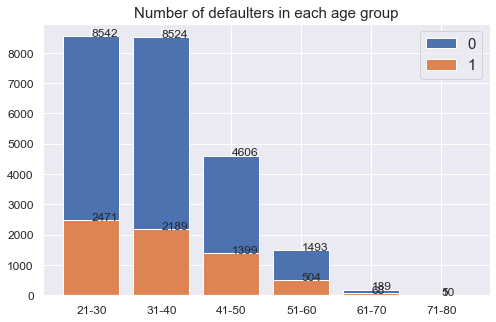

<Figure size 432x288 with 0 Axes>

In [599]:
pf_AGE_BIN=pf
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
pf_AGE_BIN['AGE_BIN'] = pd.cut(x=pf_AGE_BIN.AGE, bins=bins, labels=names, right=True)

age_cnt = pf_AGE_BIN.AGE_BIN.value_counts()
age_0 = (pf_AGE_BIN.AGE_BIN[pf['default payment next month'] == 0].value_counts())
age_1 = (pf_AGE_BIN.AGE_BIN[pf['default payment next month'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of defaulters in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()
plt.savefig("AgeVSY")

#from the above graph, we observe that high number of defaulters are in age groups between 21-40.
#since, count of age groups between 21-40 is high, the number of defaulters and  non defaulters are also high in number.

In [600]:
#### Split the dependent and independent variables.

# store the target variable 'Chance of Admit' in a dataframe 'df_target'
pf_target = pf['default payment next month']


# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'Chance of Admit' using drop()
# 'axis = 1' drops the specified column
pf_feature = pf.drop('default payment next month', axis = 1)

In [601]:
#### Filter numerical and categorical variables.

# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.number]' will include all the numerical variables
pf_num = pf_feature.select_dtypes(include = [np.number])

# display numerical features
pf_num.columns

Index(['LIMIT_BAL', 'AGE',
       'Amount of bill   statement in September, 2005 (NT dollar)',
       'Amount of bill   statement in August, 2005 (NT dollar)',
       'Amount of bill   statement in July, 2005 (NT dollar)',
       'Amount of bill   statement in June, 2005 (NT dollar)',
       'Amount of bill   statement in May, 2005 (NT dollar)',
       'Amount of bill   statement in April, 2005 (NT dollar)',
       'Amount of   previous payment. Paid in September, 2005 (NT dollar)',
       'Amount of   previous payment. Paid in August, 2005 (NT dollar)',
       'Amount of   previous payment. Paid in July, 2005 (NT dollar)',
       'Amount of   previous payment. Paid in June, 2005 (NT dollar)',
       'Amount of   previous payment. Paid in May, 2005 (NT dollar)',
       'Amount of   previous payment. Paid in April, 2005 (NT dollar)'],
      dtype='object', name=0)

In [602]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.object]' will include all the categorical variables
pf_cat = pf_feature.select_dtypes(include =[np.object])

# display categorical features
pf_cat.columns

Index(['SEX', 'EDUCATION', 'MARRIAGE',
       'History of   past payment. The repayment status in September, 2005*',
       'History of past payment. The repayment status in August, 2005*',
       'History of past payment. The repayment status in July, 2005*',
       'History of past payment. The repayment status in June, 2005*',
       'History of past payment. The repayment status in May, 2005*',
       'History of past payment. The repayment status in April, 2005*'],
      dtype='object', name=0)

In [603]:
pf_num.head()

,LIMIT_BAL,AGE,"Amount of bill statement in September, 2005 (NT dollar)","Amount of bill statement in August, 2005 (NT dollar)","Amount of bill statement in July, 2005 (NT dollar)","Amount of bill statement in June, 2005 (NT dollar)","Amount of bill statement in May, 2005 (NT dollar)","Amount of bill statement in April, 2005 (NT dollar)","Amount of previous payment. Paid in September, 2005 (NT dollar)","Amount of previous payment. Paid in August, 2005 (NT dollar)","Amount of previous payment. Paid in July, 2005 (NT dollar)","Amount of previous payment. Paid in June, 2005 (NT dollar)","Amount of previous payment. Paid in May, 2005 (NT dollar)","Amount of previous payment. Paid in April, 2005 (NT dollar)"
ID,,,,,,,,,,,,,,
1,20000.000000,24,3913.000000,3102.000000,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000
2,120000.000000,26,2682.000000,1725.000000,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000
3,90000.000000,34,29239.000000,14027.000000,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000
4,50000.000000,37,46990.000000,48233.000000,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000
5,50000.000000,57,8617.000000,5670.000000,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000


#Univarient Analysis
for i in pf_num.columns:
    plt.subplots(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    sns.distplot(pf_num[i])
    plt.xlabel(xlabel=i,fontdict={"size":12})
    plt.ylabel(ylabel=i,fontdict={"size":12})
    plt.subplot(1, 2, 2)
    sns.boxplot(y=pf_num[i])
    plt.figtext(0.1,-0.09, 'Skewness = ',fontdict={"size":15})
    plt.figtext(0.2,-0.09, pf_num[i].skew(),fontdict={"size":15})
    plt.figtext(0.1,-0.15, 'Kurtosis  =',fontdict={"size":15})
    plt.figtext(0.2,-0.15, pf_num[i].kurt(),fontdict={"size":15})
    plt.xlabel(xlabel=i,fontdict={"size":12})
    plt.ylabel(ylabel=i,fontdict={"size":12})
    plt.show()

#plotting pairplot for entire dataframe
sns.pairplot(pf,corner=True)
plt.savefig("pairplot-all")

In [604]:
#as mentioned earliers, the common element in all the numerical data is, they are highly skewed.

In [605]:
pf_cat.head()

,SEX,EDUCATION,MARRIAGE,"History of past payment. The repayment status in September, 2005*","History of past payment. The repayment status in August, 2005*","History of past payment. The repayment status in July, 2005*","History of past payment. The repayment status in June, 2005*","History of past payment. The repayment status in May, 2005*","History of past payment. The repayment status in April, 2005*"
ID,,,,,,,,,
1,2,2,1,2,2,-1,-1,-2,-2
2,2,2,2,-1,2,0,0,0,2
3,2,2,2,0,0,0,0,0,0
4,2,2,1,0,0,0,0,0,0
5,1,2,1,-1,0,-1,0,0,0


<a id="outliers"></a>
## 2.5 Outlier Analysis

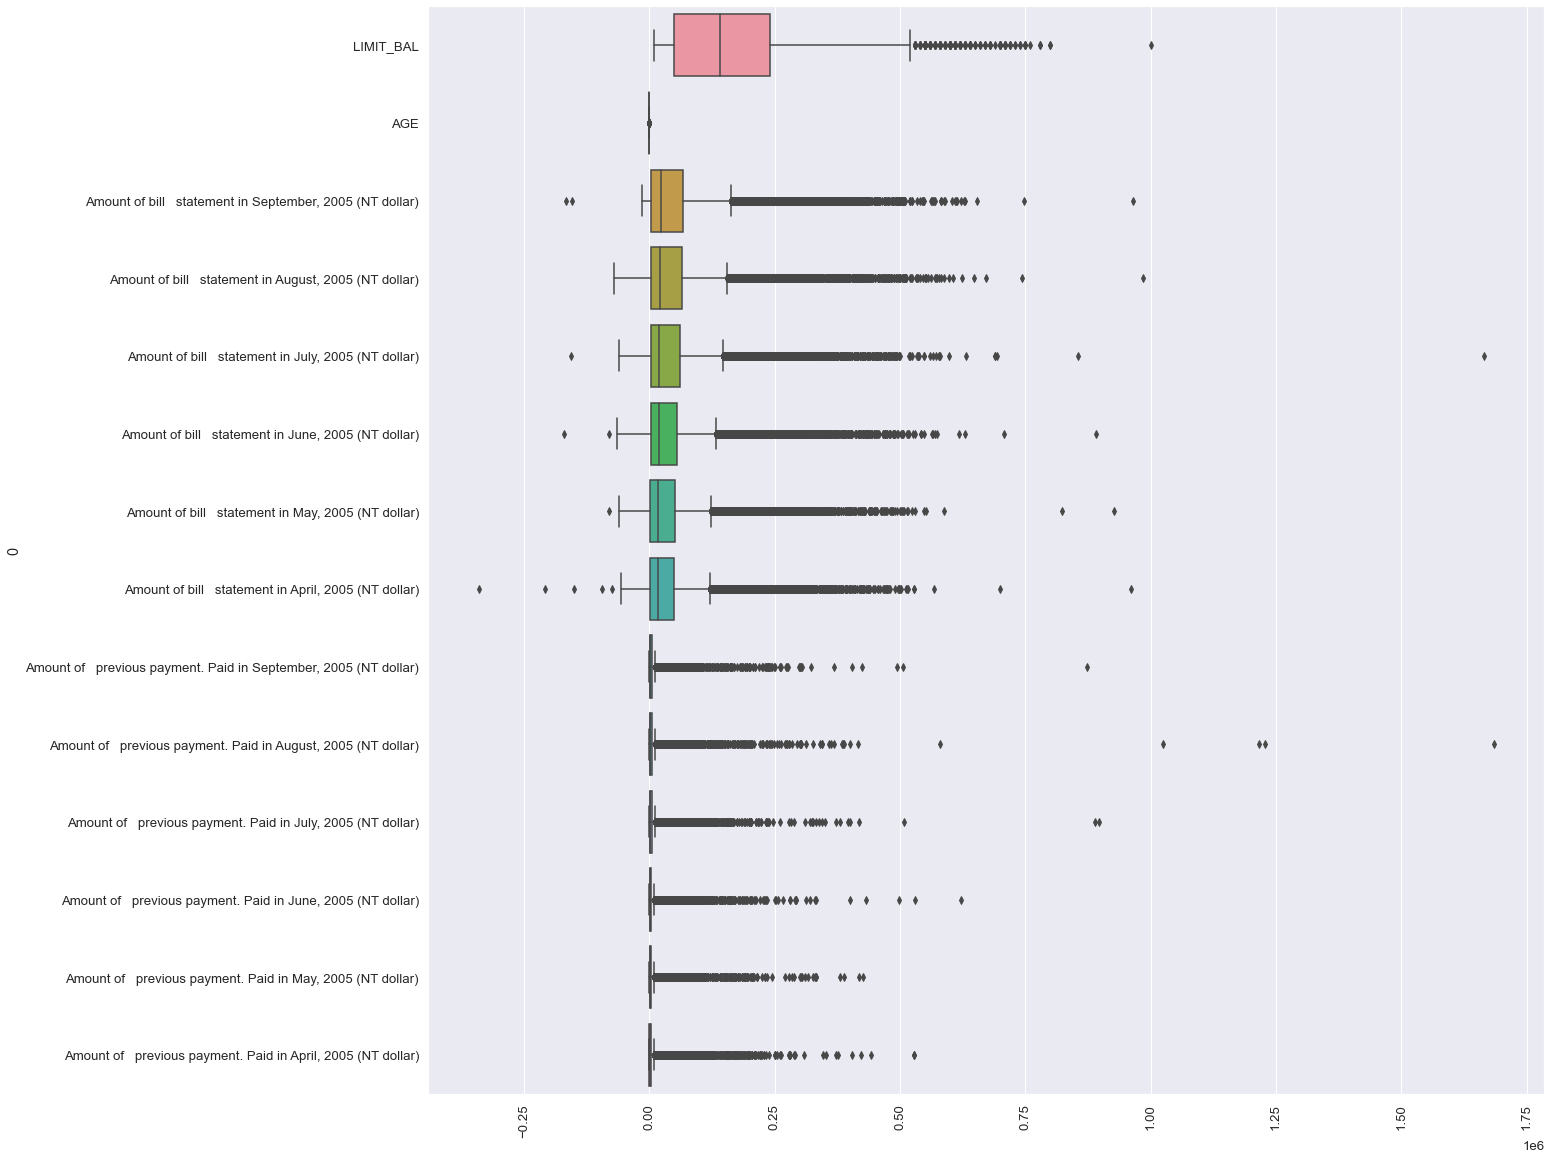

In [606]:
#boxplot of datadet
plt.figure(figsize=(20,20))
sns.boxplot(data=pf_num,orient='h')#, x='reserved_room_type', y=not_cancelled['adr'], hue='hotel')
#plt.ylabel('ADR')

#plt.title('adr for different room types')
plt.xticks(rotation=90)
#plt.title("Boxplot for dataset")
plt.savefig("Boxplot for num")
plt.show()


In [607]:
import scipy.stats as stats
stats.mstats.winsorize(pf['LIMIT_BAL'],limits=(0.0,0.002),inplace=True)

masked_array(data=[ 20000., 120000.,  90000., ...,  30000.,  80000.,
                    50000.],
             mask=False,
       fill_value=1e+20)

In [608]:
stats.mstats.winsorize(pf_num['LIMIT_BAL'],limits=(0.0,0.002),inplace=True)

masked_array(data=[ 20000., 120000.,  90000., ...,  30000.,  80000.,
                    50000.],
             mask=False,
       fill_value=1e+20)

In [609]:
#let's scale the numerical data, to visualize the outliers

In [610]:
stats.mstats.winsorize(pf['Amount of   previous payment. Paid in April, 2005 (NT dollar)'],limits=(0.0,0.001),inplace=True)

masked_array(data=[   0., 2000., 5000., ..., 3100., 1804., 1000.],
             mask=False,
       fill_value=1e+20)

In [611]:
stats.mstats.winsorize(pf['Amount of   previous payment. Paid in May, 2005 (NT dollar)'],limits=(0.0,0.001),inplace=True)

masked_array(data=[    0.,     0.,  1000., ...,  2000., 52964.,  1000.],
             mask=False,
       fill_value=1e+20)

In [612]:
stats.mstats.winsorize(pf['Amount of   previous payment. Paid in June, 2005 (NT dollar)'],limits=(0.0,0.001),inplace=True)

masked_array(data=[   0., 1000., 1000., ..., 4200., 1926., 1000.],
             mask=False,
       fill_value=1e+20)

In [613]:
stats.mstats.winsorize(pf['Amount of   previous payment. Paid in July, 2005 (NT dollar)'],limits=(0.0,0.001),inplace=True)

masked_array(data=[    0.,  1000.,  1000., ..., 22000.,  1178.,  1430.],
             mask=False,
       fill_value=1e+20)

In [614]:
stats.mstats.winsorize(pf['Amount of   previous payment. Paid in August, 2005 (NT dollar)'],limits=(0.0,0.001),inplace=True)

masked_array(data=[ 689., 1000., 1500., ...,    0., 3409., 1800.],
             mask=False,
       fill_value=1e+20)

In [615]:
stats.mstats.winsorize(pf['Amount of   previous payment. Paid in September, 2005 (NT dollar)'],limits=(0.0,0.001),inplace=True)

masked_array(data=[    0.,     0.,  1518., ...,     0., 85900.,  2078.],
             mask=False,
       fill_value=1e+20)

In [616]:
stats.mstats.winsorize(pf['Amount of bill   statement in April, 2005 (NT dollar)'],limits=(0.0002,0.0003),inplace=True)

masked_array(data=[    0.,  3261., 15549., ..., 19357., 48944., 15313.],
             mask=False,
       fill_value=1e+20)

In [617]:
stats.mstats.winsorize(pf['Amount of bill   statement in May, 2005 (NT dollar)'],limits=(0.0002,0.0003),inplace=True)

masked_array(data=[    0.,  3455., 14948., ..., 20582., 11855., 32428.],
             mask=False,
       fill_value=1e+20)

In [618]:
stats.mstats.winsorize(pf['Amount of bill   statement in June, 2005 (NT dollar)'],limits=(0.0002,0.0003),inplace=True)

masked_array(data=[    0.,  3272., 14331., ..., 20878., 52774., 36535.],
             mask=False,
       fill_value=1e+20)

In [619]:
stats.mstats.winsorize(pf['Amount of bill   statement in July, 2005 (NT dollar)'],limits=(0.0002,0.0003),inplace=True)

masked_array(data=[  689.,  2682., 13559., ...,  2758., 76304., 49764.],
             mask=False,
       fill_value=1e+20)

In [620]:
stats.mstats.winsorize(pf['Amount of bill   statement in August, 2005 (NT dollar)'],limits=(0.0002,0.0003),inplace=True)

masked_array(data=[ 3102.,  1725., 14027., ...,  3356., 78379., 48905.],
             mask=False,
       fill_value=1e+20)

In [621]:
stats.mstats.winsorize(pf['Amount of bill   statement in September, 2005 (NT dollar)'],limits=(0.0002,0.0003),inplace=True)

masked_array(data=[ 3913.,  2682., 29239., ...,  3565., -1645., 47929.],
             mask=False,
       fill_value=1e+20)

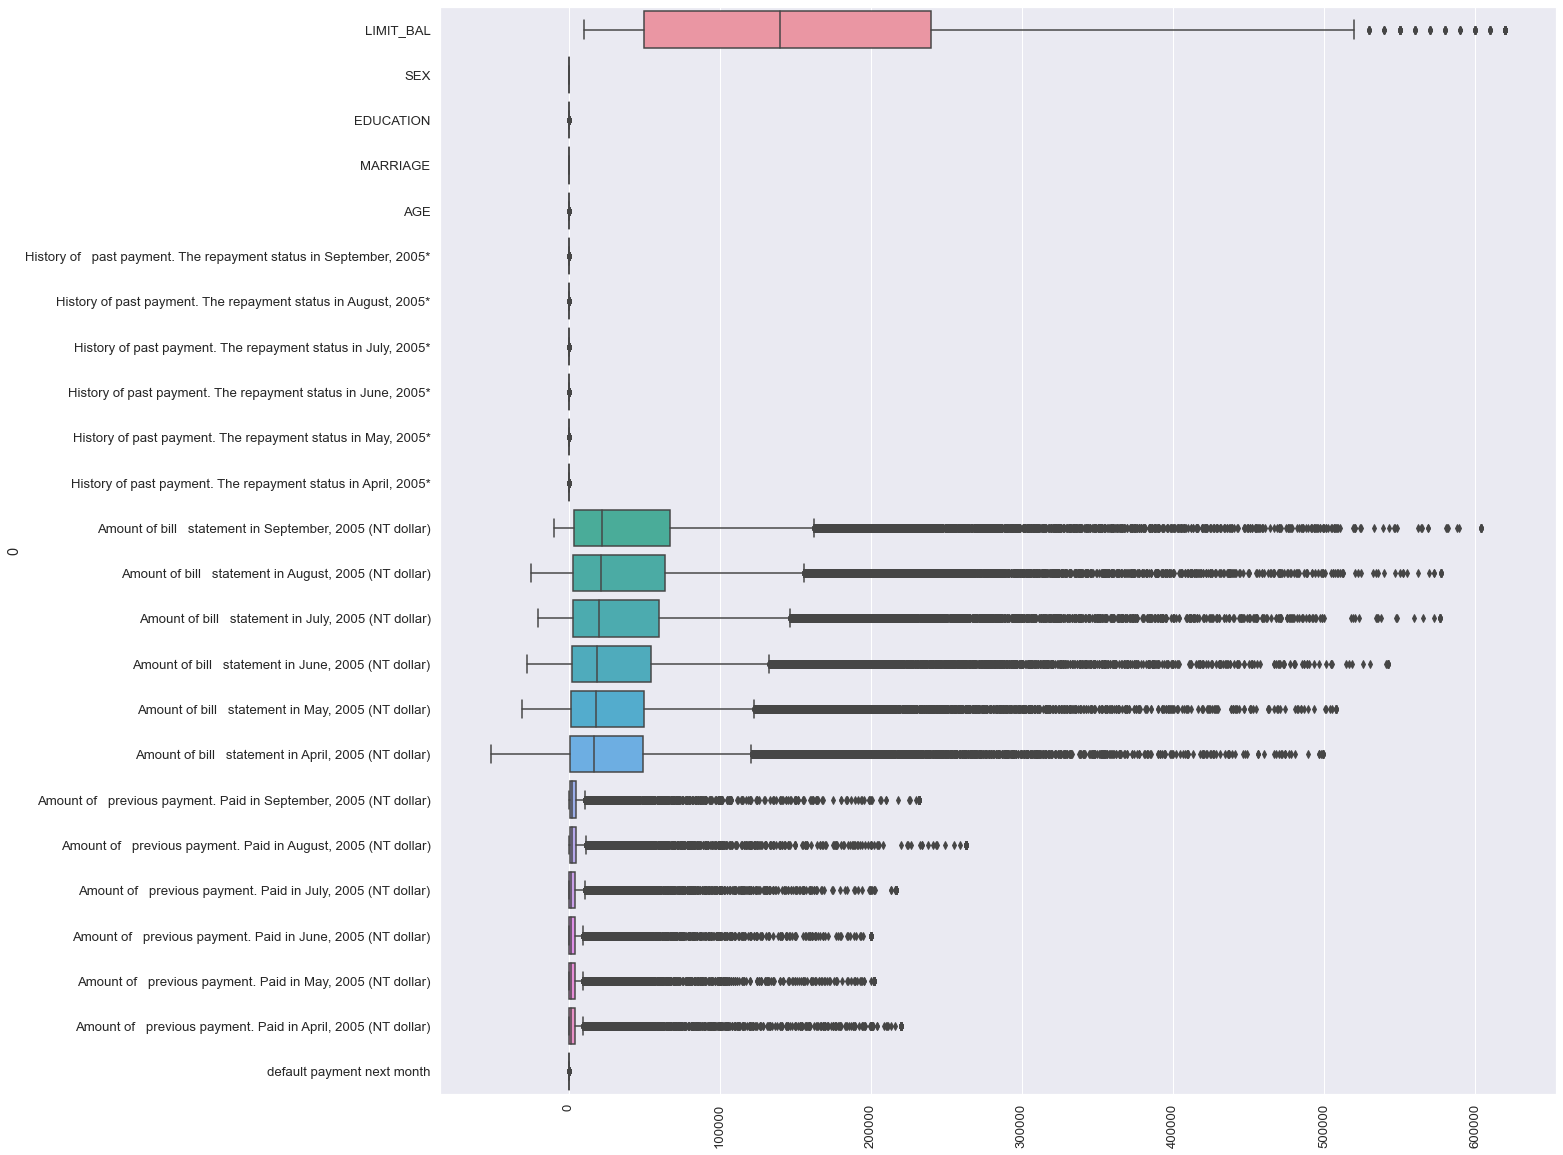

In [622]:
#boxplot of datadet
plt.figure(figsize=(20,20))
sns.boxplot(data=pf,orient='h')
#plt.ylabel('ADR')

#plt.title('adr for different room types')
plt.xticks(rotation=90)
#plt.title("Boxplot for dataset")
plt.savefig("Boxplot for num")
plt.show()

# 3. Feature Engineering

In [623]:
pf.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,"History of past payment. The repayment status in September, 2005*","History of past payment. The repayment status in August, 2005*","History of past payment. The repayment status in July, 2005*","History of past payment. The repayment status in June, 2005*","History of past payment. The repayment status in May, 2005*","History of past payment. The repayment status in April, 2005*","Amount of bill statement in September, 2005 (NT dollar)","Amount of bill statement in August, 2005 (NT dollar)","Amount of bill statement in July, 2005 (NT dollar)","Amount of bill statement in June, 2005 (NT dollar)","Amount of bill statement in May, 2005 (NT dollar)","Amount of bill statement in April, 2005 (NT dollar)","Amount of previous payment. Paid in September, 2005 (NT dollar)","Amount of previous payment. Paid in August, 2005 (NT dollar)","Amount of previous payment. Paid in July, 2005 (NT dollar)","Amount of previous payment. Paid in June, 2005 (NT dollar)","Amount of previous payment. Paid in May, 2005 (NT dollar)","Amount of previous payment. Paid in April, 2005 (NT dollar)",default payment next month,AGE_BIN
ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000.000000,2,2,1,24,2,2,-1,-1,-2,-2,3913.000000,3102.000000,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1,21-30
2,120000.000000,2,2,2,26,-1,2,0,0,0,2,2682.000000,1725.000000,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1,21-30
3,90000.000000,2,2,2,34,0,0,0,0,0,0,29239.000000,14027.000000,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0,31-40
4,50000.000000,2,2,1,37,0,0,0,0,0,0,46990.000000,48233.000000,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0,31-40
5,50000.000000,1,2,1,57,-1,0,-1,0,0,0,8617.000000,5670.000000,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0,51-60


In [624]:
pf_cat.dtypes

0
SEX                                                                    object
EDUCATION                                                              object
MARRIAGE                                                               object
History of   past payment. The repayment status in September, 2005*    object
History of past payment. The repayment status in August, 2005*         object
History of past payment. The repayment status in July, 2005*           object
History of past payment. The repayment status in June, 2005*           object
History of past payment. The repayment status in May, 2005*            object
History of past payment. The repayment status in April, 2005*          object
dtype: object

In [625]:
pf['History of past payment. The repayment status in April, 2005*'].replace({1:1,2:1,3:1,4:1,5:1,6:1,7:1,
                                                                                8:1,0:0,-1:0,-2:0},inplace=True)


In [626]:
pf['History of past payment. The repayment status in April, 2005*'].value_counts()

0    26921
1     3079
Name: History of past payment. The repayment status in April, 2005*, dtype: int64

In [627]:
pf['History of past payment. The repayment status in May, 2005*'].replace({1:1,2:1,3:1,4:1,5:1,6:1,7:1,
                                                                                8:1,0:0,-1:0,-2:0},inplace=True)

In [628]:
pf['History of past payment. The repayment status in May, 2005*'].value_counts()

0    27032
1     2968
Name: History of past payment. The repayment status in May, 2005*, dtype: int64

In [629]:
pf["History of past payment. The repayment status in June, 2005*"]=pf["History of past payment. The repayment status in June, 2005*"].astype("int")
pf["History of past payment. The repayment status in July, 2005*"]=pf["History of past payment. The repayment status in July, 2005*"].astype("int")
pf["History of past payment. The repayment status in August, 2005*"]=pf["History of past payment. The repayment status in August, 2005*"].astype("int")
pf["History of   past payment. The repayment status in September, 2005*"]=pf["History of   past payment. The repayment status in September, 2005*"].astype("int")

In [630]:
pf['History of past payment. The repayment status in June, 2005*'].replace({1:1,2:1,3:1,4:1,5:1,6:1,7:1,
                                                                                8:1,0:0,-1:0,-2:0},inplace=True)
pf['History of past payment. The repayment status in July, 2005*'].replace({1:1,2:1,3:1,4:1,5:1,6:1,7:1,
                                                                                8:1,0:0,-1:0,-2:0},inplace=True)
pf['History of past payment. The repayment status in August, 2005*'].replace({1:1,2:1,3:1,4:1,5:1,6:1,7:1,
                                                                                8:1,0:0,-1:0,-2:0},inplace=True)
pf['History of   past payment. The repayment status in September, 2005*'].replace({1:1,2:1,3:1,4:1,5:1,6:1,7:1,
                                                                                8:1,0:0,-1:0,-2:0},inplace=True)

In [631]:
pf.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,"History of past payment. The repayment status in September, 2005*","History of past payment. The repayment status in August, 2005*","History of past payment. The repayment status in July, 2005*","History of past payment. The repayment status in June, 2005*","History of past payment. The repayment status in May, 2005*","History of past payment. The repayment status in April, 2005*","Amount of bill statement in September, 2005 (NT dollar)","Amount of bill statement in August, 2005 (NT dollar)","Amount of bill statement in July, 2005 (NT dollar)","Amount of bill statement in June, 2005 (NT dollar)","Amount of bill statement in May, 2005 (NT dollar)","Amount of bill statement in April, 2005 (NT dollar)","Amount of previous payment. Paid in September, 2005 (NT dollar)","Amount of previous payment. Paid in August, 2005 (NT dollar)","Amount of previous payment. Paid in July, 2005 (NT dollar)","Amount of previous payment. Paid in June, 2005 (NT dollar)","Amount of previous payment. Paid in May, 2005 (NT dollar)","Amount of previous payment. Paid in April, 2005 (NT dollar)",default payment next month,AGE_BIN
ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000.000000,2,2,1,24,1,1,0,0,0,0,3913.000000,3102.000000,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1,21-30
2,120000.000000,2,2,2,26,0,1,0,0,0,1,2682.000000,1725.000000,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1,21-30
3,90000.000000,2,2,2,34,0,0,0,0,0,0,29239.000000,14027.000000,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0,31-40
4,50000.000000,2,2,1,37,0,0,0,0,0,0,46990.000000,48233.000000,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0,31-40
5,50000.000000,1,2,1,57,0,0,0,0,0,0,8617.000000,5670.000000,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0,51-60


In [632]:
conda install -c conda-forge dython

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [633]:
from dython.nominal import associations

In [634]:
cat=pf[['History of past payment. The repayment status in April, 2005*','History of past payment. The repayment status in May, 2005*',
      'History of past payment. The repayment status in June, 2005*','History of past payment. The repayment status in July, 2005*',
      'History of past payment. The repayment status in August, 2005*','History of   past payment. The repayment status in September, 2005*']]

In [635]:
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(cat)
categorical_features

[]

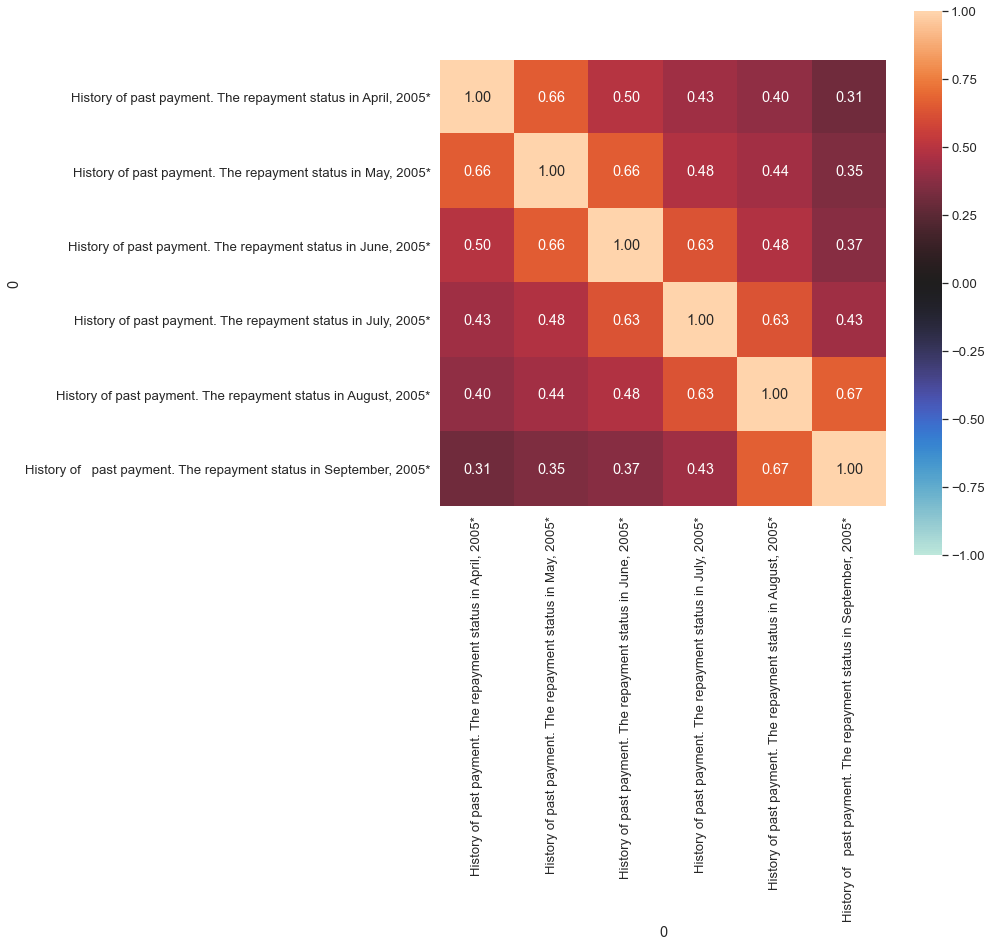

In [636]:
complete_correlation= associations(cat, figsize=(10,10))

In [637]:
cat.corr(method='spearman')

,"History of past payment. The repayment status in April, 2005*","History of past payment. The repayment status in May, 2005*","History of past payment. The repayment status in June, 2005*","History of past payment. The repayment status in July, 2005*","History of past payment. The repayment status in August, 2005*","History of past payment. The repayment status in September, 2005*"
0,,,,,,
"History of past payment. The repayment status in April, 2005*",1.000000,0.662683,0.496443,0.434247,0.397391,0.309867
"History of past payment. The repayment status in May, 2005*",0.662683,1.000000,0.662637,0.482382,0.443047,0.348587
"History of past payment. The repayment status in June, 2005*",0.496443,0.662637,1.000000,0.625660,0.478977,0.371030
"History of past payment. The repayment status in July, 2005*",0.434247,0.482382,0.625660,1.000000,0.625247,0.430527
"History of past payment. The repayment status in August, 2005*",0.397391,0.443047,0.478977,0.625247,1.000000,0.668176
"History of past payment. The repayment status in September, 2005*",0.309867,0.348587,0.371030,0.430527,0.668176,1.000000


In [638]:
pf_target=pf['default payment next month']

In [639]:
pf['AGE'].isnull().sum()

0

In [640]:
pf.loc[(pf["AGE"]>=20)& (pf["AGE"]<=35),'Age'] ="young"
pf.loc[(pf["AGE"]>35)& (pf["AGE"]<=59),'Age'] ="Middle"
pf.loc[(pf["AGE"]>=60)& (pf["AGE"]<=80),'Age']="Old"


In [641]:
pf.drop(['AGE'], axis = 1,inplace=True)

In [642]:
pf.drop(['AGE_BIN'], axis = 1,inplace=True)

In [643]:
pf['Age']=pf['Age'].replace({'young':0,'Middle':1,'Old':2})

In [644]:
pf.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,"History of past payment. The repayment status in September, 2005*","History of past payment. The repayment status in August, 2005*","History of past payment. The repayment status in July, 2005*","History of past payment. The repayment status in June, 2005*","History of past payment. The repayment status in May, 2005*","History of past payment. The repayment status in April, 2005*","Amount of bill statement in September, 2005 (NT dollar)","Amount of bill statement in August, 2005 (NT dollar)","Amount of bill statement in July, 2005 (NT dollar)","Amount of bill statement in June, 2005 (NT dollar)","Amount of bill statement in May, 2005 (NT dollar)","Amount of bill statement in April, 2005 (NT dollar)","Amount of previous payment. Paid in September, 2005 (NT dollar)","Amount of previous payment. Paid in August, 2005 (NT dollar)","Amount of previous payment. Paid in July, 2005 (NT dollar)","Amount of previous payment. Paid in June, 2005 (NT dollar)","Amount of previous payment. Paid in May, 2005 (NT dollar)","Amount of previous payment. Paid in April, 2005 (NT dollar)",default payment next month,Age
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000.000000,2,2,1,1,1,0,0,0,0,3913.000000,3102.000000,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1,0
2,120000.000000,2,2,2,0,1,0,0,0,1,2682.000000,1725.000000,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1,0
3,90000.000000,2,2,2,0,0,0,0,0,0,29239.000000,14027.000000,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0,0
4,50000.000000,2,2,1,0,0,0,0,0,0,46990.000000,48233.000000,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0,1
5,50000.000000,1,2,1,0,0,0,0,0,0,8617.000000,5670.000000,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0,1


In [645]:
df=pf.copy()

In [646]:
df1=pf.iloc[:,4:10]

In [647]:
df1.head()

,"History of past payment. The repayment status in September, 2005*","History of past payment. The repayment status in August, 2005*","History of past payment. The repayment status in July, 2005*","History of past payment. The repayment status in June, 2005*","History of past payment. The repayment status in May, 2005*","History of past payment. The repayment status in April, 2005*"
ID,,,,,,
1,1,1,0,0,0,0
2,0,1,0,0,0,1
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,0,0,0


In [648]:
df1.reset_index(drop=True,inplace=True)

In [649]:
df1.iloc[0:len(df1)].head()

,"History of past payment. The repayment status in September, 2005*","History of past payment. The repayment status in August, 2005*","History of past payment. The repayment status in July, 2005*","History of past payment. The repayment status in June, 2005*","History of past payment. The repayment status in May, 2005*","History of past payment. The repayment status in April, 2005*"
0,1,1,0,0,0,0
1,0,1,0,0,0,1
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [650]:
for i in df1.iloc[0:len(df1)]:
    print(i)

History of   past payment. The repayment status in September, 2005*
History of past payment. The repayment status in August, 2005*
History of past payment. The repayment status in July, 2005*
History of past payment. The repayment status in June, 2005*
History of past payment. The repayment status in May, 2005*
History of past payment. The repayment status in April, 2005*


In [651]:
pf['Outstanding']=pf.iloc[:,4:10].sum(axis=1,numeric_only=True)

In [652]:
pf.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,"History of past payment. The repayment status in September, 2005*","History of past payment. The repayment status in August, 2005*","History of past payment. The repayment status in July, 2005*","History of past payment. The repayment status in June, 2005*","History of past payment. The repayment status in May, 2005*","History of past payment. The repayment status in April, 2005*","Amount of bill statement in September, 2005 (NT dollar)","Amount of bill statement in August, 2005 (NT dollar)","Amount of bill statement in July, 2005 (NT dollar)","Amount of bill statement in June, 2005 (NT dollar)","Amount of bill statement in May, 2005 (NT dollar)","Amount of bill statement in April, 2005 (NT dollar)","Amount of previous payment. Paid in September, 2005 (NT dollar)","Amount of previous payment. Paid in August, 2005 (NT dollar)","Amount of previous payment. Paid in July, 2005 (NT dollar)","Amount of previous payment. Paid in June, 2005 (NT dollar)","Amount of previous payment. Paid in May, 2005 (NT dollar)","Amount of previous payment. Paid in April, 2005 (NT dollar)",default payment next month,Age,Outstanding
ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000.000000,2,2,1,1,1,0,0,0,0,3913.000000,3102.000000,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1,0,2
2,120000.000000,2,2,2,0,1,0,0,0,1,2682.000000,1725.000000,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1,0,2
3,90000.000000,2,2,2,0,0,0,0,0,0,29239.000000,14027.000000,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0,0,0
4,50000.000000,2,2,1,0,0,0,0,0,0,46990.000000,48233.000000,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0,1,0
5,50000.000000,1,2,1,0,0,0,0,0,0,8617.000000,5670.000000,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0,1,0


In [653]:
pf.drop(pf.iloc[:,4:10],axis=1,inplace=True)

In [654]:
pf['Outstanding'].replace({1:1,2:1,3:1,4:1,5:1,6:1},inplace=True)

In [655]:
pf['Outstanding'].value_counts()

0    19931
1    10069
Name: Outstanding, dtype: int64

In [656]:
pf.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,"Amount of bill statement in September, 2005 (NT dollar)","Amount of bill statement in August, 2005 (NT dollar)","Amount of bill statement in July, 2005 (NT dollar)","Amount of bill statement in June, 2005 (NT dollar)","Amount of bill statement in May, 2005 (NT dollar)","Amount of bill statement in April, 2005 (NT dollar)","Amount of previous payment. Paid in September, 2005 (NT dollar)","Amount of previous payment. Paid in August, 2005 (NT dollar)","Amount of previous payment. Paid in July, 2005 (NT dollar)","Amount of previous payment. Paid in June, 2005 (NT dollar)","Amount of previous payment. Paid in May, 2005 (NT dollar)","Amount of previous payment. Paid in April, 2005 (NT dollar)",default payment next month,Age,Outstanding
ID,,,,,,,,,,,,,,,,,,,
1,20000.000000,2,2,1,3913.000000,3102.000000,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1,0,1
2,120000.000000,2,2,2,2682.000000,1725.000000,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1,0,1
3,90000.000000,2,2,2,29239.000000,14027.000000,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0,0,0
4,50000.000000,2,2,1,46990.000000,48233.000000,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0,1,0
5,50000.000000,1,2,1,8617.000000,5670.000000,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0,1,0


In [657]:
pf['Age'] = pf['Age'].astype(object)
pf['Outstanding'] = pf['Outstanding'].astype(object)

In [658]:
pf.dtypes

0
LIMIT_BAL                                                            float64
SEX                                                                   object
EDUCATION                                                             object
MARRIAGE                                                              object
Amount of bill   statement in September, 2005 (NT dollar)            float64
Amount of bill   statement in August, 2005 (NT dollar)               float64
Amount of bill   statement in July, 2005 (NT dollar)                 float64
Amount of bill   statement in June, 2005 (NT dollar)                 float64
Amount of bill   statement in May, 2005 (NT dollar)                  float64
Amount of bill   statement in April, 2005 (NT dollar)                float64
Amount of   previous payment. Paid in September, 2005 (NT dollar)    float64
Amount of   previous payment. Paid in August, 2005 (NT dollar)       float64
Amount of   previous payment. Paid in July, 2005 (NT dollar)         float

In [659]:
pf_target=pf['default payment next month']
pf.drop('default payment next month',axis=1,inplace=True)

In [660]:
pf_cat=pf.select_dtypes(include='object')
pf_num=pf.select_dtypes(exclude='object')

In [661]:
pf_cat['Outstanding'].replace({1:1,2:1,3:1,4:1,5:1,6:1},inplace=True)

In [662]:
pf_cat['Outstanding'].value_counts()

0    19931
1    10069
Name: Outstanding, dtype: int64

In [663]:
pf_cat.head()

,SEX,EDUCATION,MARRIAGE,Age,Outstanding
ID,,,,,
1,2,2,1,0,1
2,2,2,2,0,1
3,2,2,2,0,0
4,2,2,1,1,0
5,1,2,1,1,0


In [664]:
pf['Outstanding'] = pf['Outstanding'].astype(object)

In [665]:
pf_cat = pd.get_dummies(data = pf_cat, drop_first=True)

In [666]:
pf_cat.head()

,Outstanding,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,MARRIAGE_2,MARRIAGE_3,Age_1,Age_2
ID,,,,,,,,,,
1,1,1,1,0,0,0,0,0,0,0
2,1,1,1,0,0,0,1,0,0,0
3,0,1,1,0,0,0,1,0,0,0
4,0,1,1,0,0,0,0,0,1,0
5,0,0,1,0,0,0,0,0,1,0


In [667]:
pf_cat.reset_index(drop=True,inplace=True)

In [668]:
pf_num.head()

,LIMIT_BAL,"Amount of bill statement in September, 2005 (NT dollar)","Amount of bill statement in August, 2005 (NT dollar)","Amount of bill statement in July, 2005 (NT dollar)","Amount of bill statement in June, 2005 (NT dollar)","Amount of bill statement in May, 2005 (NT dollar)","Amount of bill statement in April, 2005 (NT dollar)","Amount of previous payment. Paid in September, 2005 (NT dollar)","Amount of previous payment. Paid in August, 2005 (NT dollar)","Amount of previous payment. Paid in July, 2005 (NT dollar)","Amount of previous payment. Paid in June, 2005 (NT dollar)","Amount of previous payment. Paid in May, 2005 (NT dollar)","Amount of previous payment. Paid in April, 2005 (NT dollar)"
ID,,,,,,,,,,,,,
1,20000.000000,3913.000000,3102.000000,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000
2,120000.000000,2682.000000,1725.000000,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000
3,90000.000000,29239.000000,14027.000000,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000
4,50000.000000,46990.000000,48233.000000,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000
5,50000.000000,8617.000000,5670.000000,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000


##### Robust Scaling

In [669]:
from sklearn.preprocessing import RobustScaler

trans = RobustScaler()
pf_num.loc[:,:] = trans.fit_transform(pf_num)
pf_num.describe()

,LIMIT_BAL,"Amount of bill statement in September, 2005 (NT dollar)","Amount of bill statement in August, 2005 (NT dollar)","Amount of bill statement in July, 2005 (NT dollar)","Amount of bill statement in June, 2005 (NT dollar)","Amount of bill statement in May, 2005 (NT dollar)","Amount of bill statement in April, 2005 (NT dollar)","Amount of previous payment. Paid in September, 2005 (NT dollar)","Amount of previous payment. Paid in August, 2005 (NT dollar)","Amount of previous payment. Paid in July, 2005 (NT dollar)","Amount of previous payment. Paid in June, 2005 (NT dollar)","Amount of previous payment. Paid in May, 2005 (NT dollar)","Amount of previous payment. Paid in April, 2005 (NT dollar)"
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.143858,0.453800,0.458107,0.467364,0.463679,0.457998,0.454577,0.869361,0.890810,0.800780,0.869288,0.852238,0.935459
std,0.679712,1.155656,1.162062,1.192466,1.227905,1.248634,1.234815,3.660288,3.955125,3.536358,3.697416,3.665353,4.197568
min,-0.684211,-0.506569,-0.752227,-0.702775,-0.891964,-1.003263,-1.429094,-0.524214,-0.482121,-0.437424,-0.403524,-0.396930,-0.386374
25%,-0.473684,-0.296271,-0.298505,-0.303004,-0.320535,-0.337443,-0.329876,-0.274588,-0.282217,-0.342649,-0.323895,-0.330114,-0.356044
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.526316,0.703729,0.701495,0.696996,0.679465,0.662557,0.670124,0.725412,0.717783,0.657351,0.676105,0.669886,0.643956
max,2.526316,9.154996,9.119425,9.685931,10.034659,10.120458,10.054367,57.335996,62.658267,52.304982,53.505952,53.140249,56.301372


##### PCA

In [671]:
cov_matrix=np.cov(pf_num.T)
cov_matrix.shape
cov_matrix[0:5]
eig_value,eig_vectors=np.linalg.eig(cov_matrix)
eig_value
eig_vectors
percent_var=[]

In [672]:
for i in eig_value:
    variation=(i/sum(eig_value))*100
    percent_var.append(variation)
    
percent_var
eig_value
np.cumsum(percent_var)

array([ 30.84156098,  45.43299545,  52.12131851,  65.27013779,
        75.82454722,  87.53786481,  98.95704656,  99.37827948,
        99.76061196,  99.86722469,  99.92787882,  99.96096271,
       100.        ])

In [673]:
pfn=pf_num.copy()

In [674]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 7, random_state = 10)

# the 'fit_transform()' fits the PCA on the data transforms the data to compute the principal components 
# pass the standardized data to fit PCA
components = pca.fit_transform(pf_num)
pf_pca = pd.DataFrame(data = components, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7'])

# head() to display top five rows of the transformed dataj
pf_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-3.528678,0.336138,-0.404744,-0.018952,-0.305752,0.006041,1.068039
1,-3.013685,0.654542,-0.356103,-0.207631,-0.404834,0.150707,1.053795
2,-2.206238,1.100888,-0.470725,-0.039080,-0.189751,-0.031823,0.595206
3,-2.361579,0.049817,-0.297555,-0.026688,-0.012989,-0.070081,-0.283204
4,2.525584,-4.164768,-4.010217,-1.473702,-4.145814,0.469235,1.803306


In [675]:
print(pf_cat.shape)
print(pf_pca.shape)

(30000, 10)
(30000, 7)


In [676]:
df=pd.concat([pf_cat,pf_pca],axis=1)

##### DataFrame after complete Feature Engineering.

In [677]:
df.head()

,Outstanding,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,MARRIAGE_2,MARRIAGE_3,Age_1,Age_2,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,1,1,1,0,0,0,0,0,0,0,-3.528678,0.336138,-0.404744,-0.018952,-0.305752,0.006041,1.068039
1,1,1,1,0,0,0,1,0,0,0,-3.013685,0.654542,-0.356103,-0.207631,-0.404834,0.150707,1.053795
2,0,1,1,0,0,0,1,0,0,0,-2.206238,1.100888,-0.470725,-0.039080,-0.189751,-0.031823,0.595206
3,0,1,1,0,0,0,0,0,1,0,-2.361579,0.049817,-0.297555,-0.026688,-0.012989,-0.070081,-0.283204
4,0,0,1,0,0,0,0,0,1,0,2.525584,-4.164768,-4.010217,-1.473702,-4.145814,0.469235,1.803306


In [678]:
df.shape

(30000, 17)

<a id='Stats'></a>
# 4. Statistical Analysis

In [679]:
#let's check the correlation
pf_num.corr()

,LIMIT_BAL,"Amount of bill statement in September, 2005 (NT dollar)","Amount of bill statement in August, 2005 (NT dollar)","Amount of bill statement in July, 2005 (NT dollar)","Amount of bill statement in June, 2005 (NT dollar)","Amount of bill statement in May, 2005 (NT dollar)","Amount of bill statement in April, 2005 (NT dollar)","Amount of previous payment. Paid in September, 2005 (NT dollar)","Amount of previous payment. Paid in August, 2005 (NT dollar)","Amount of previous payment. Paid in July, 2005 (NT dollar)","Amount of previous payment. Paid in June, 2005 (NT dollar)","Amount of previous payment. Paid in May, 2005 (NT dollar)","Amount of previous payment. Paid in April, 2005 (NT dollar)"
0,,,,,,,,,,,,,
LIMIT_BAL,1.000000,0.284197,0.276988,0.283955,0.292944,0.294140,0.289220,0.210900,0.226150,0.229298,0.217754,0.225313,0.228889
"Amount of bill statement in September, 2005 (NT dollar)",0.284197,1.000000,0.952324,0.902545,0.861335,0.830569,0.803697,0.156136,0.134427,0.156284,0.166977,0.175785,0.185769
"Amount of bill statement in August, 2005 (NT dollar)",0.276988,0.952324,1.000000,0.938727,0.893107,0.860053,0.832056,0.297163,0.127905,0.148372,0.155502,0.168526,0.178509
"Amount of bill statement in July, 2005 (NT dollar)",0.283955,0.902545,0.938727,1.000000,0.933960,0.893739,0.860713,0.263114,0.320839,0.139715,0.152280,0.174121,0.183916
"Amount of bill statement in June, 2005 (NT dollar)",0.292944,0.861335,0.893107,0.933960,1.000000,0.941524,0.902847,0.249144,0.264532,0.308490,0.143191,0.169157,0.177931
"Amount of bill statement in May, 2005 (NT dollar)",0.294140,0.830569,0.860053,0.893739,0.941524,1.000000,0.947848,0.230594,0.230847,0.253848,0.304144,0.151989,0.166672
"Amount of bill statement in April, 2005 (NT dollar)",0.289220,0.803697,0.832056,0.860713,0.902847,0.947848,1.000000,0.211411,0.203972,0.232060,0.256732,0.313857,0.126469
"Amount of previous payment. Paid in September, 2005 (NT dollar)",0.210900,0.156136,0.297163,0.263114,0.249144,0.230594,0.211411,1.000000,0.231197,0.203082,0.164366,0.160734,0.190940
"Amount of previous payment. Paid in August, 2005 (NT dollar)",0.226150,0.134427,0.127905,0.320839,0.264532,0.230847,0.203972,0.231197,1.000000,0.211450,0.160055,0.161570,0.187633


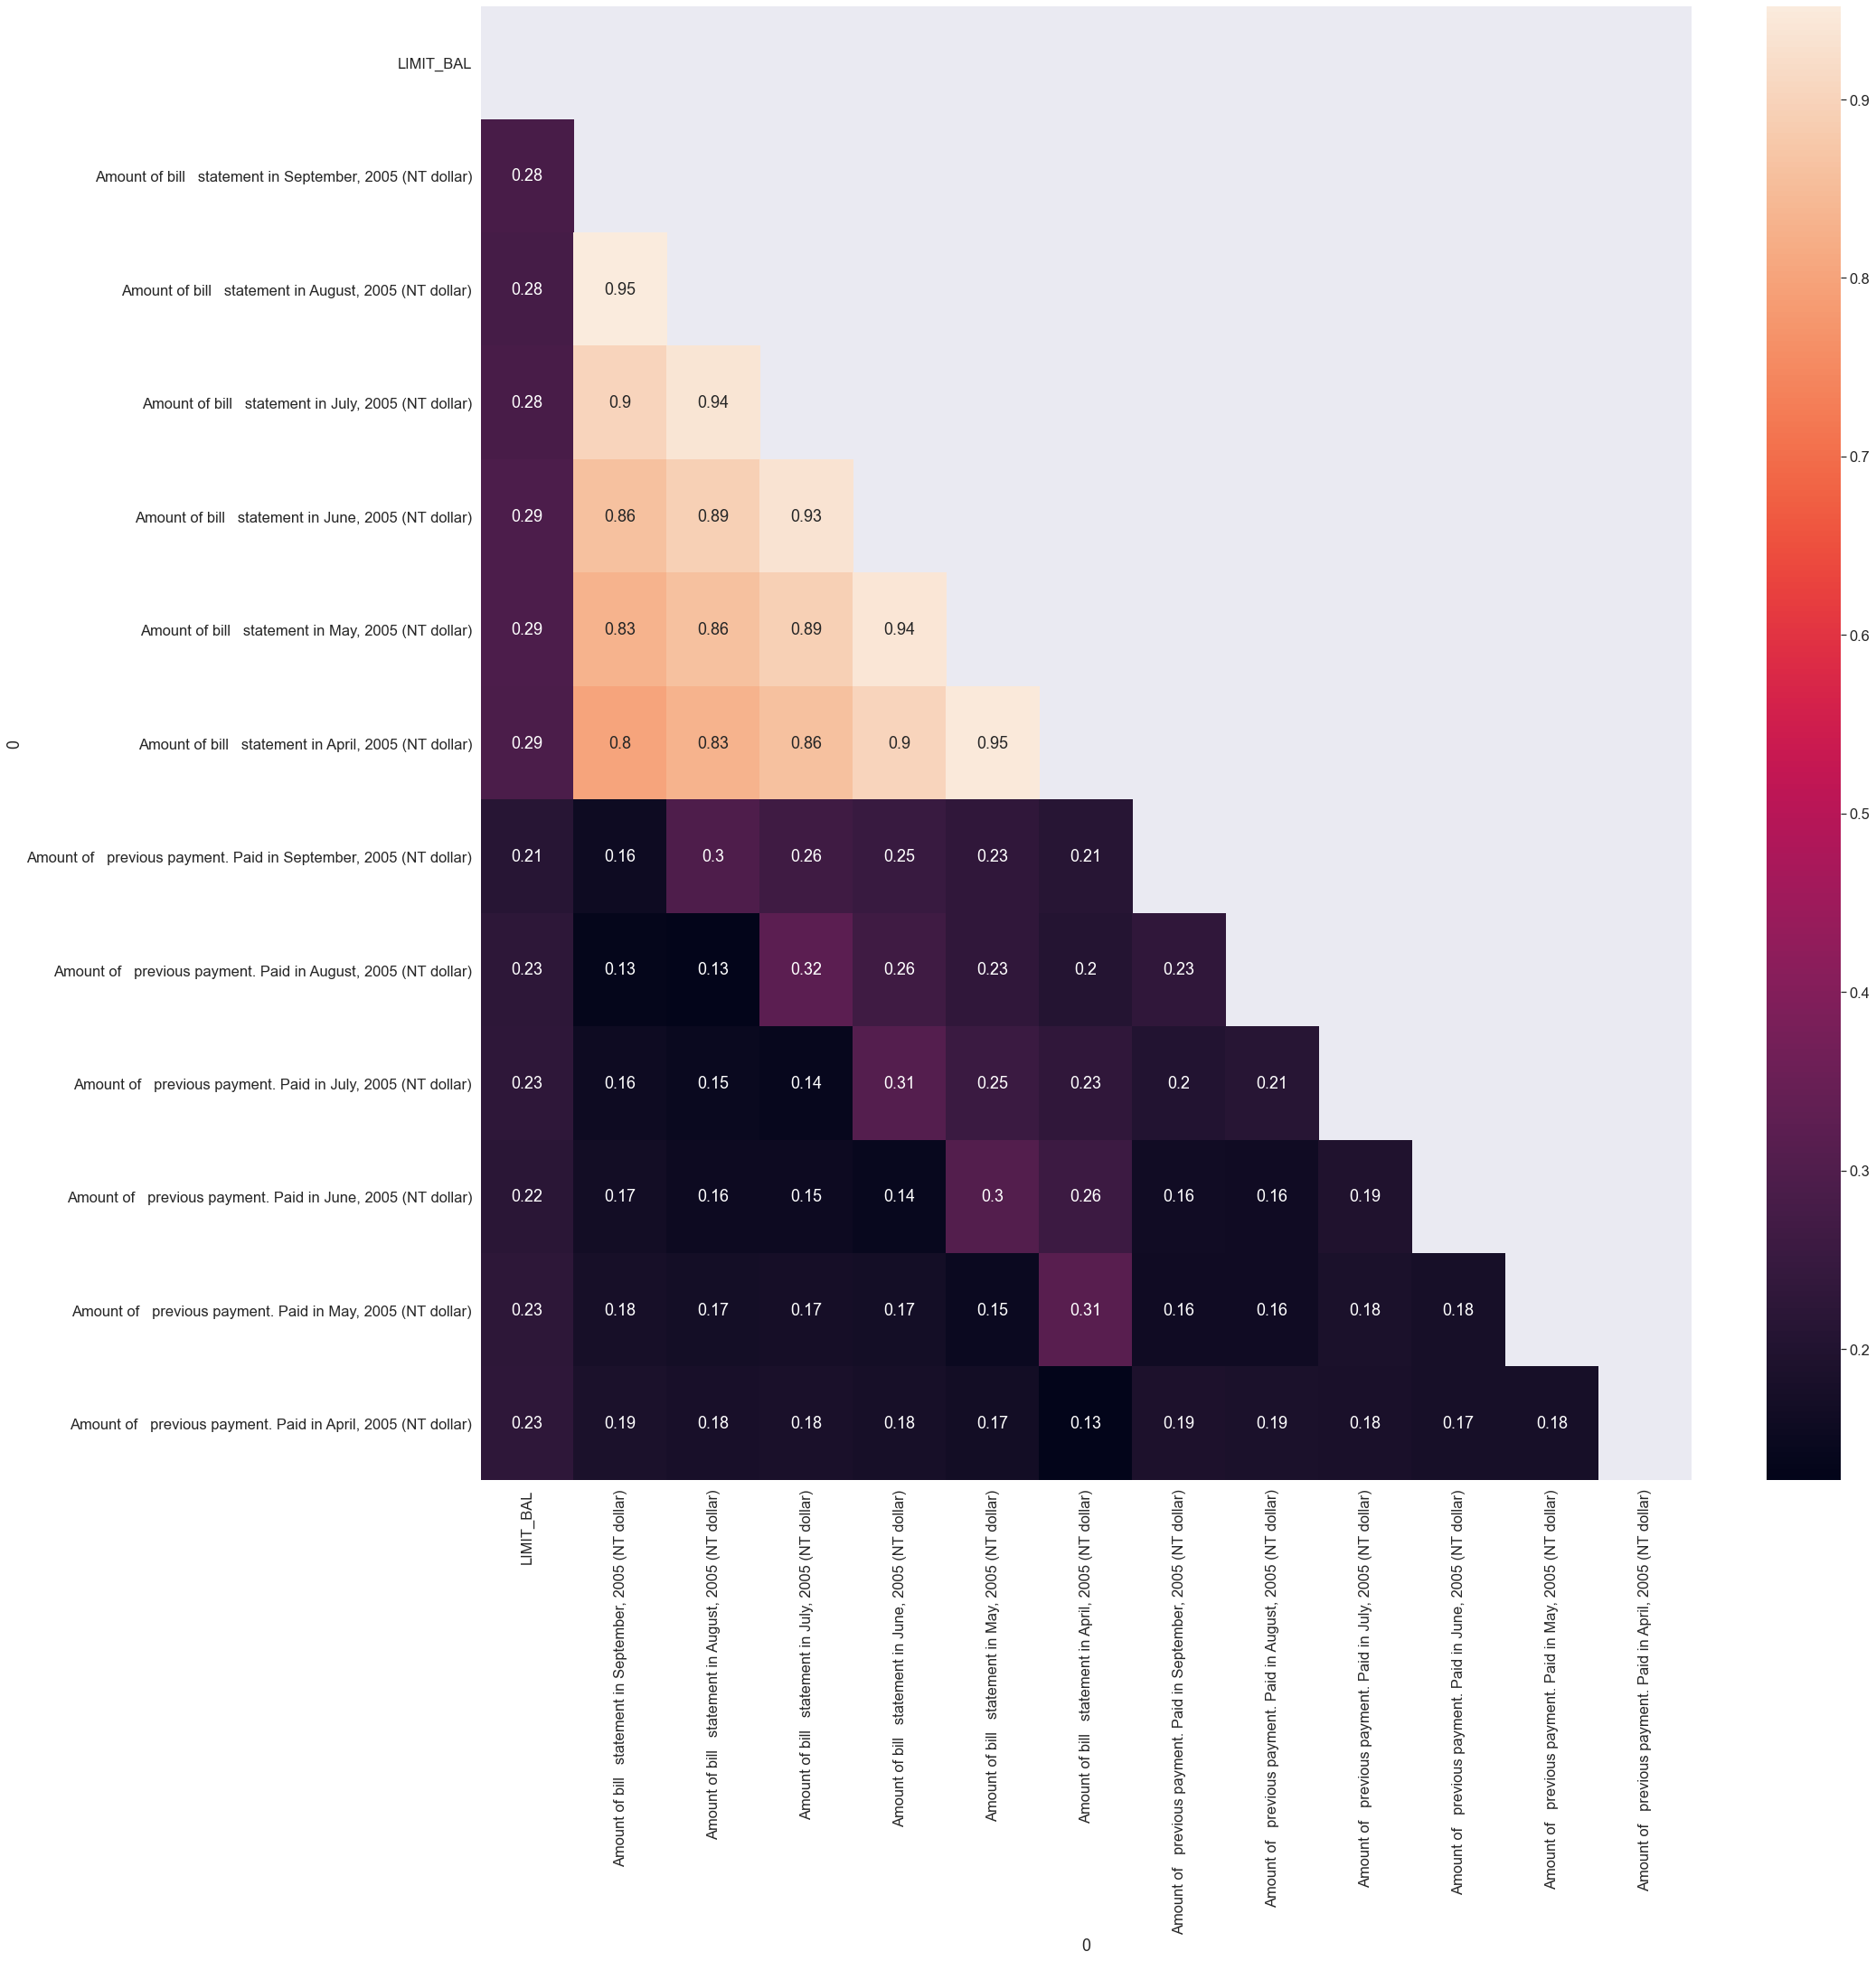

In [680]:
#Checking correlation through heatmap
plt.figure(figsize=(30,30))
corr= pf_num.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

sns.set(font_scale=1.5)

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix)
plt.savefig("heatmap")

In [681]:
defaultcorr = pf.corr().iloc[:-1,-1:]   # data = df.corr()  
defaultcorr

,"Amount of previous payment. Paid in April, 2005 (NT dollar)"
0,
LIMIT_BAL,0.228889
"Amount of bill statement in September, 2005 (NT dollar)",0.185769
"Amount of bill statement in August, 2005 (NT dollar)",0.178509
"Amount of bill statement in July, 2005 (NT dollar)",0.183916
"Amount of bill statement in June, 2005 (NT dollar)",0.177931
"Amount of bill statement in May, 2005 (NT dollar)",0.166672
"Amount of bill statement in April, 2005 (NT dollar)",0.126469
"Amount of previous payment. Paid in September, 2005 (NT dollar)",0.190940
"Amount of previous payment. Paid in August, 2005 (NT dollar)",0.187633


#Amount of bill statements variabeles are highly correlated.

Statistics

Hypothesis of Chi-square test

H0 : Attributes are independent

H1 : Attributes are dependent

In [682]:
pf_cat.columns

Index(['Outstanding', 'SEX_2', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'MARRIAGE_2', 'MARRIAGE_3', 'Age_1', 'Age_2'],
      dtype='object')

In [683]:
from sklearn.feature_selection import chi2
import scipy.stats as stats

p_values = []
for i in pf_cat.columns:
    pval = stats.chi2_contingency(pd.crosstab(pf_target, pf_cat[i]))[1]
    p_values.append(str(pval))
    #print( stats.chi2_contingency(pd.crosstab(pf_target, pf_cat[i]))[1])

In [684]:
p_val_cat = pd.DataFrame({'Feature': pf_cat.columns, 'p-values':p_values})
p_val_cat

,Feature,p-values
0,Outstanding,0.029872969517949714
1,SEX_2,0.0005109059630729483
2,EDUCATION_2,0.20311477446806522
3,EDUCATION_3,0.4081251120101723
4,EDUCATION_4,0.948691755053374
5,EDUCATION_5,0.7143817831819779
6,MARRIAGE_2,0.7225053419716749
7,MARRIAGE_3,0.05805626335766373
8,Age_1,0.35399043732556834
9,Age_2,0.46738721580188713


In [685]:
#Since the p_values is less than 0.05, we reject the null hypothesis. Hence all the features are significant.

Hypothesis for Shapiro Test

H0: Data is normally distributed

H1: Data is not normally distributed

In [686]:
from warnings import filterwarnings
filterwarnings('ignore')
for i in pf_num.columns:
    print('p_value for shapiro test', i, stats.shapiro(pf_num[i])[1])

p_value for shapiro test LIMIT_BAL 0.0
p_value for shapiro test Amount of bill   statement in September, 2005 (NT dollar) 0.0
p_value for shapiro test Amount of bill   statement in August, 2005 (NT dollar) 0.0
p_value for shapiro test Amount of bill   statement in July, 2005 (NT dollar) 0.0
p_value for shapiro test Amount of bill   statement in June, 2005 (NT dollar) 0.0
p_value for shapiro test Amount of bill   statement in May, 2005 (NT dollar) 0.0
p_value for shapiro test Amount of bill   statement in April, 2005 (NT dollar) 0.0
p_value for shapiro test Amount of   previous payment. Paid in September, 2005 (NT dollar) 0.0
p_value for shapiro test Amount of   previous payment. Paid in August, 2005 (NT dollar) 0.0
p_value for shapiro test Amount of   previous payment. Paid in July, 2005 (NT dollar) 0.0
p_value for shapiro test Amount of   previous payment. Paid in June, 2005 (NT dollar) 0.0
p_value for shapiro test Amount of   previous payment. Paid in May, 2005 (NT dollar) 0.0
p_valu

#Since p_value is less than 0.05, we reject the null hypothesis. Hence the data is not normally distributed and we perform non parametric tests.

Hypothesis of Mann-Whitney U Test

H0 : Two samples have the same mean (i.e insignificant)

H1 : Two samples have different mean (i.e significant)

In [687]:
Yes = pf_num[pf_target==1]
No = pf_num[pf_target==0]
p_values=[]
for i in pf_num.columns:
    pval = stats.mannwhitneyu(Yes[i], No[i])[1]
    p_values.append(pval)

In [688]:
p_val_num = pd.DataFrame({'Feature': pf_num.columns,
                          'p_values' : p_values})
p_val_num

,Feature,p_values
0,LIMIT_BAL,0.000000
1,"Amount of bill statement in September, 2005 ...",0.000006
2,"Amount of bill statement in August, 2005 (NT...",0.003531
3,"Amount of bill statement in July, 2005 (NT d...",0.014102
4,"Amount of bill statement in June, 2005 (NT d...",0.073885
5,"Amount of bill statement in May, 2005 (NT do...",0.117685
6,"Amount of bill statement in April, 2005 (NT ...",0.494741
7,Amount of previous payment. Paid in Septembe...,0.000000
8,"Amount of previous payment. Paid in August, ...",0.000000
9,"Amount of previous payment. Paid in July, 20...",0.000000


In [689]:
significant_num_features = p_val_num[p_val_num['p_values']<0.05]
significant_num_features

,Feature,p_values
0,LIMIT_BAL,0.000000
1,"Amount of bill statement in September, 2005 ...",0.000006
2,"Amount of bill statement in August, 2005 (NT...",0.003531
3,"Amount of bill statement in July, 2005 (NT d...",0.014102
7,Amount of previous payment. Paid in Septembe...,0.000000
8,"Amount of previous payment. Paid in August, ...",0.000000
9,"Amount of previous payment. Paid in July, 20...",0.000000
10,"Amount of previous payment. Paid in June, 20...",0.000000
11,"Amount of previous payment. Paid in May, 200...",0.000000
12,"Amount of previous payment. Paid in April, 2...",0.000000


ANOVA


In [690]:
p_values=[]
for i in pf_num.columns:
    pval = stats.f_oneway(Yes[i], No[i])[1]
    p_values.append(pval)

p_val_num_1 = pd.DataFrame({'Feature': pf_num.columns,
                          'p_values' : p_values})
p_val_num_1[p_val_num_1['p_values']<0.05]

,Feature,p_values
0,LIMIT_BAL,0.000000
1,"Amount of bill statement in September, 2005 ...",0.000669
2,"Amount of bill statement in August, 2005 (NT...",0.014845
3,"Amount of bill statement in July, 2005 (NT d...",0.017232
7,Amount of previous payment. Paid in Septembe...,0.000000
8,"Amount of previous payment. Paid in August, ...",0.000000
9,"Amount of previous payment. Paid in July, 20...",0.000000
10,"Amount of previous payment. Paid in June, 20...",0.000000
11,"Amount of previous payment. Paid in May, 200...",0.000000
12,"Amount of previous payment. Paid in April, 2...",0.000000


In [691]:
#ANOVA tells us all the variables are significant to our target

In [692]:
pf_target.head()

ID
1    1
2    1
3    0
4    0
5    0
Name: default payment next month, dtype: int32

In [693]:
pf_target.value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [694]:
#the proportion of 0's, 1's is imbalanced.
name=pf_target

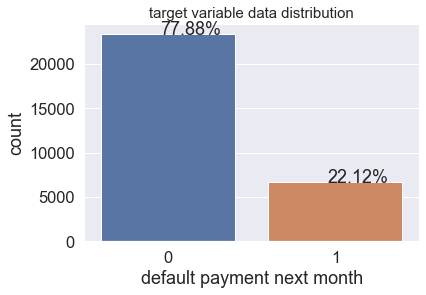

In [826]:
#Checking Data distribution in target variable
sns.countplot(pf_target)

plt.text(x = -0.05, y = pf_target.value_counts()[0] + 1, s = str(round((pf_target.value_counts()[0])*100/len(pf_target),2)) + '%')
plt.text(x = 0.95, y = pf_target.value_counts()[1] +1, s = str(round((pf_target.value_counts()[1])*100/len(pf_target),2)) + '%')

plt.title("target variable data distribution", fontsize=15)
plt.savefig("target-plot")


# 5. Model Building

### before SMOTE

In [696]:
pf_target.reset_index(drop=True,inplace=True)

In [697]:
df = sm.add_constant(df)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
xtrain, xtest, ytrain, ytest = train_test_split(df, pf_target, random_state = 10, test_size = 0.3)  #RD x=is const(x) + indepe vari's ,y=target vari??

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', xtrain.shape)
print('y_train', ytrain.shape)

# print dimension of test set
print('X_test', xtest.shape)
print('y_test', ytest.shape)

X_train (21000, 18)
y_train (21000,)
X_test (9000, 18)
y_test (9000,)


In [698]:
df.dtypes

const          float64
Outstanding      int64
SEX_2            uint8
EDUCATION_2      uint8
EDUCATION_3      uint8
EDUCATION_4      uint8
EDUCATION_5      uint8
MARRIAGE_2       uint8
MARRIAGE_3       uint8
Age_1            uint8
Age_2            uint8
PC1            float64
PC2            float64
PC3            float64
PC4            float64
PC5            float64
PC6            float64
PC7            float64
dtype: object

In [699]:
df['Outstanding'] = df['Outstanding'].astype(int)
df['SEX_2'] = df['SEX_2'].astype(int)
df['EDUCATION_2'] = df['EDUCATION_2'].astype(int)
df['EDUCATION_3'] = df['EDUCATION_3'].astype(int)
df['EDUCATION_4'] = df['EDUCATION_4'].astype(int)
df['EDUCATION_5'] = df['EDUCATION_5'].astype(int)
df['MARRIAGE_2'] = df['MARRIAGE_2'].astype(int)
df['MARRIAGE_3'] = df['MARRIAGE_3'].astype(int)
df['Age_1'] = df['Age_1'].astype(int)
df['Age_2'] = df['Age_2'].astype(int)

##### a) Logistic Model 

In [700]:
#logistic model

# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(ytrain, xtrain).fit()                       #RD

# print the summary of the model
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.461091
         Iterations 7
                               Logit Regression Results                               
Dep. Variable:     default payment next month   No. Observations:                21000
Model:                                  Logit   Df Residuals:                    20982
Method:                                   MLE   Df Model:                           17
Date:                        Fri, 13 May 2022   Pseudo R-squ.:                  0.1247
Time:                                12:11:05   Log-Likelihood:                -9682.9
converged:                               True   LL-Null:                       -11063.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.9702      0.057    -34.7

In [701]:
y_pred_train_prob=logreg.predict(xtrain)
y_pred_train_prob.head()
y_pred_train = [ 0 if x < 0.5 else 1 for x in y_pred_train_prob]
y_pred_train[0:5]

[0, 0, 0, 0, 0]

In [702]:
y_pred_prob = logreg.predict(xtest)                         #RD

# print the y_pred_prob
y_pred_prob.head()

#Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. if 'y_pred_prob' is less than 0.5, then consider it to be 0 else consider it to be 1.

# convert probabilities to 0 and 1 using 'if_else'  #RD  list comprehension
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

# print the first five observations of y_pred
y_pred[0:5]


[0, 0, 0, 0, 0]

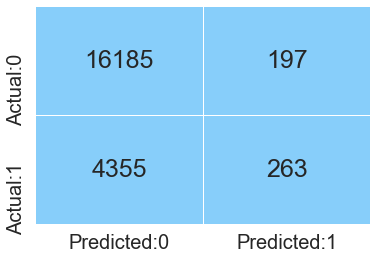

In [704]:
#Confusion matrix for Train data set
cm_train = confusion_matrix(ytrain, y_pred_train)
conf_matrix_train = pd.DataFrame(data = cm_train,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix_train, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

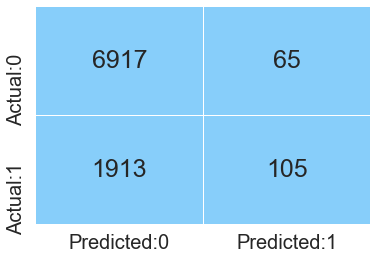

In [705]:
#Confusion matrix for test data set
cm_train = confusion_matrix(ytest, y_pred)
conf_matrix_train = pd.DataFrame(data = cm_train,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix_train, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [706]:
acc_table1 = classification_report(ytrain, y_pred_train)

# print the table
print(acc_table1)

              precision    recall  f1-score   support

           0       0.79      0.99      0.88     16382
           1       0.57      0.06      0.10      4618

    accuracy                           0.78     21000
   macro avg       0.68      0.52      0.49     21000
weighted avg       0.74      0.78      0.71     21000



In [707]:
acc_table = classification_report(ytest, y_pred)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.78      0.99      0.87      6982
           1       0.62      0.05      0.10      2018

    accuracy                           0.78      9000
   macro avg       0.70      0.52      0.49      9000
weighted avg       0.75      0.78      0.70      9000



In [708]:
df.drop('MARRIAGE_3',axis=1,inplace=True)

## b) Decision Tree

In [709]:
def get_train_report(model):
    train_pred = model.predict(xtrain)
    return(classification_report(ytrain, train_pred))

In [710]:
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(xtest)

    # return the classification report for test data
    return(classification_report(ytest, test_pred))


In [711]:
def plot_confusion_matrix(model):
    y_pred = model.predict(xtest)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(ytest, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()


In [842]:
# create a generalized function to calculate the metrics values for test set


def plot_roc(model):
    y_pred_prob = model.predict_proba(xtest)[:,1]     #RD??
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve ', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(ytest, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

In [713]:
# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [714]:
df.drop('const',axis=1,inplace=True)

In [715]:
xtrain, xtest, ytrain, ytest = train_test_split(df,pf_target, random_state = 10, test_size = 0.3)
tree = DecisionTreeClassifier(random_state = 10)

# fit the model using fit() on train data
base_model = tree.fit(xtrain,ytrain)


#SCORE ON TRAIN:
base_model.score(xtrain, ytrain)

0.9969523809523809

In [716]:
#SCORE ON TEST:
base_model.score(xtest, ytest)

0.7066666666666667

In [717]:
train_pred = base_model.predict(xtrain)

    # return the performace measures on train set
train_report=classification_report(ytrain, train_pred)

In [718]:
test_pred = base_model.predict(xtest)

    # return the performace measures on test set
test_report=classification_report(ytest, test_pred)

In [719]:
print(train_report)
print(test_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16382
           1       1.00      0.99      0.99      4618

    accuracy                           1.00     21000
   macro avg       1.00      0.99      1.00     21000
weighted avg       1.00      1.00      1.00     21000

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      6982
           1       0.35      0.37      0.36      2018

    accuracy                           0.71      9000
   macro avg       0.58      0.59      0.59      9000
weighted avg       0.71      0.71      0.71      9000



In [720]:
cm=confusion_matrix(ytrain, train_pred)
cm

array([[16369,    13],
       [   51,  4567]], dtype=int64)

In [721]:
cm=confusion_matrix(ytest, test_pred)
cm

array([[5613, 1369],
       [1271,  747]], dtype=int64)

In [853]:
#Score card

print(update_score_card(model=base_model,Name='Decision Tree before SMOTE',xtest=xtest,xtrain=xtrain))


                   Model_Name  AUC Score (test data)  \
0  Decision Tree before SMOTE               0.587046   

   Precision Score (test data)  Recall Score (test data)  \
0                          NaN                       NaN   

   Accuracy Score (test data)  Kappa Score (test data)  f1-score (test data)  \
0                    0.706667                      NaN                   NaN   

   AUC Score (Train data)  Precision Score (Train data)  \
0                0.833781                           NaN   

   Recall Score (Train data)Accuracy Score (Train data)  \
0                                                NaN      

   Kappa Score (Train data)  f1-score (Train data)  \
0                       NaN                    NaN   

   Accuracy Score (Train data)  Kappa Score(Train data)  \
0                     0.833781                 0.667562   

   Kappa Score(test data)  Precision Score(Train data)  \
0                0.171138                     0.998814   

   Precision Score(tes

##### After SMOTE decision tree

In [722]:
## after SMOTE
from imblearn.over_sampling import SMOTE

oversample=SMOTE()
xtrain,ytrain=oversample.fit_resample(xtrain,ytrain)
ytrain.value_counts()

0    16382
1    16382
Name: default payment next month, dtype: int64

In [723]:
tree = DecisionTreeClassifier(random_state = 10)

# fit the model using fit() on train data
sm_model = tree.fit(xtrain,ytrain)


#SCORE ON TRAIN:
sm_model.score(xtrain, ytrain)

0.9980161152484434

In [724]:
sm_model.score(xtest, ytest)

0.654

In [725]:
train_pred = sm_model.predict(xtrain)

    # return the performace measures on train set
train_report=classification_report(ytrain, train_pred)

In [726]:
test_pred = sm_model.predict(xtest)

    # return the performace measures on test set
test_report=classification_report(ytest, test_pred)

In [727]:
print(train_report)
print(test_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16382
           1       1.00      1.00      1.00     16382

    accuracy                           1.00     32764
   macro avg       1.00      1.00      1.00     32764
weighted avg       1.00      1.00      1.00     32764

              precision    recall  f1-score   support

           0       0.82      0.71      0.76      6982
           1       0.32      0.47      0.38      2018

    accuracy                           0.65      9000
   macro avg       0.57      0.59      0.57      9000
weighted avg       0.71      0.65      0.67      9000



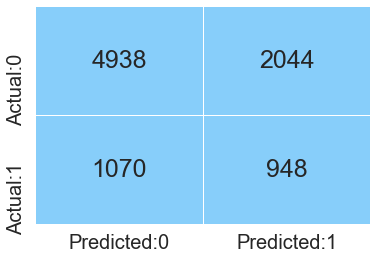

In [728]:
#CM
plot_confusion_matrix(sm_model)

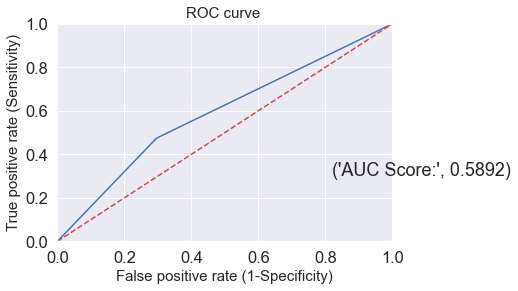

In [844]:
#ROC
plot_roc(sm_model)

In [854]:
#Score card
print(update_score_card(model=sm_model,Name='Decision Tree after SMOTE',xtest=xtest,xtrain=xtrain))


                   Model_Name  AUC Score (test data)  \
0  Decision Tree before SMOTE               0.587046   
1   Decision Tree after SMOTE               0.588510   

   Precision Score (test data)  Recall Score (test data)  \
0                          NaN                       NaN   
1                          NaN                       NaN   

   Accuracy Score (test data)  Kappa Score (test data)  f1-score (test data)  \
0                    0.706667                      NaN                   NaN   
1                    0.654000                      NaN                   NaN   

   AUC Score (Train data)  Precision Score (Train data)  \
0                0.833781                           NaN   
1                0.998016                           NaN   

   Recall Score (Train data)Accuracy Score (Train data)  \
0                                                NaN      
1                                                NaN      

   Kappa Score (Train data)  f1-score (Train data)  \

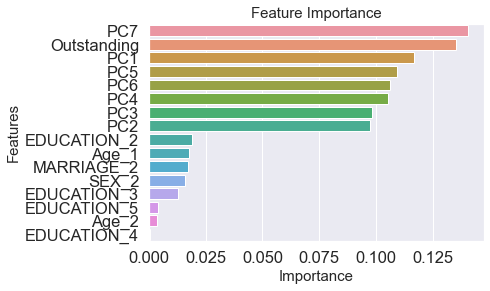

In [730]:
important_features = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': sm_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

##### Hyperparameter Tuning for Decision tree

In [793]:

tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]
 
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(xtrain, ytrain)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 8, 'min_samples_leaf': 1, 'min_samples_split': 2} 



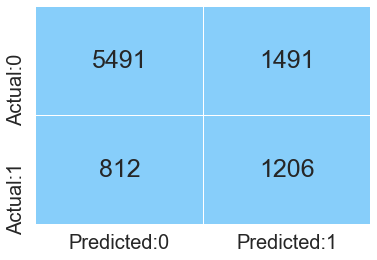

In [799]:
#CM
plot_confusion_matrix(tree_grid_model)

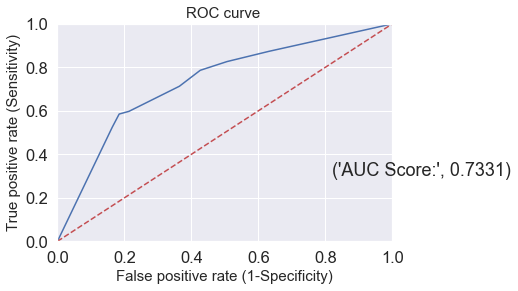

In [843]:
#ROC
plot_roc(tree_grid_model)

In [797]:
train_pred = sm_model.predict(xtrain)

    # return the performace measures on train set
train_report=classification_report(ytrain, train_pred)

test_pred = tree_grid_model.predict(xtest)

    # return the performace measures on test set
test_report=classification_report(ytest, test_pred)
print("Train")
print(train_report)
print("Test")
print(test_report)

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16382
           1       1.00      1.00      1.00     16382

    accuracy                           1.00     32764
   macro avg       1.00      1.00      1.00     32764
weighted avg       1.00      1.00      1.00     32764

Test
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      6982
           1       0.45      0.60      0.51      2018

    accuracy                           0.74      9000
   macro avg       0.66      0.69      0.67      9000
weighted avg       0.78      0.74      0.76      9000



In [855]:

#Score card
print(update_score_card(model=tree_grid_model,Name='Decision Tree after Hyperparameter-tuning',xtest=xtest,xtrain=xtrain))


                                  Model_Name  AUC Score (test data)  \
0                 Decision Tree before SMOTE               0.587046   
1                  Decision Tree after SMOTE               0.588510   
2  Decision Tree after Hyperparameter-tuning               0.692036   

   Precision Score (test data)  Recall Score (test data)  \
0                          NaN                       NaN   
1                          NaN                       NaN   
2                          NaN                       NaN   

   Accuracy Score (test data)  Kappa Score (test data)  f1-score (test data)  \
0                    0.706667                      NaN                   NaN   
1                    0.654000                      NaN                   NaN   
2                    0.744111                      NaN                   NaN   

   AUC Score (Train data)  Precision Score (Train data)  \
0                0.833781                           NaN   
1                0.998016          

##### c) Random Forest

In [731]:
## Random Forest 

In [732]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model = rf_classification.fit(xtrain, ytrain)

In [733]:
train_report = get_train_report(rf_model)
print(train_report) 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     16382
           1       0.99      0.99      0.99     16382

    accuracy                           0.99     32764
   macro avg       0.99      0.99      0.99     32764
weighted avg       0.99      0.99      0.99     32764



In [736]:
test_report = get_test_report(rf_model )
print(test_report)

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      6982
           1       0.42      0.46      0.44      2018

    accuracy                           0.73      9000
   macro avg       0.63      0.64      0.63      9000
weighted avg       0.74      0.73      0.74      9000



In [856]:
#Score card
print(update_score_card(model=rf_model,Name='Random forest',xtest=xtest,xtrain=xtrain))


                                  Model_Name  AUC Score (test data)  \
0                 Decision Tree before SMOTE               0.587046   
1                  Decision Tree after SMOTE               0.588510   
2  Decision Tree after Hyperparameter-tuning               0.692036   
3                              Random forest               0.636768   

   Precision Score (test data)  Recall Score (test data)  \
0                          NaN                       NaN   
1                          NaN                       NaN   
2                          NaN                       NaN   
3                          NaN                       NaN   

   Accuracy Score (test data)  Kappa Score (test data)  f1-score (test data)  \
0                    0.706667                      NaN                   NaN   
1                    0.654000                      NaN                   NaN   
2                    0.744111                      NaN                   NaN   
3                    0.

##### Hyperparameter tuning for random forest using gridsearch.

In [804]:


# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass a list of values to 'n_estimators' to build the different number of trees in the random forest
# pass a list of values to 'max_depth' that assigns maximum depth of the tree
# 'max_features' assigns maximum number of features to consider for the best split. We pass the string 'sqrt' and 'log2'
# 'sqrt' considers maximum number of features equal to the square root of total features
# 'log2' considers maximum number of features equal to the log of total features with base 2
# pass a list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass a list of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass a list of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
 
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_classification = RandomForestClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(xtrain, ytrain)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 30} 



In [845]:
# instantiate the 'RandomForestClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_model1 = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
rf_model1 = rf_model1.fit(xtrain, ytrain)

# print the performance measures for test set for the model with best parameters
print('Classification Report for train set:\n', get_train_report(rf_model1))
print('Classification Report for test set:\n', get_test_report(rf_model1))

Classification Report for train set:
               precision    recall  f1-score   support

           0       0.68      0.74      0.71     16382
           1       0.72      0.66      0.69     16382

    accuracy                           0.70     32764
   macro avg       0.70      0.70      0.70     32764
weighted avg       0.70      0.70      0.70     32764

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.88      0.74      0.81      6982
           1       0.43      0.67      0.52      2018

    accuracy                           0.72      9000
   macro avg       0.66      0.70      0.66      9000
weighted avg       0.78      0.72      0.74      9000



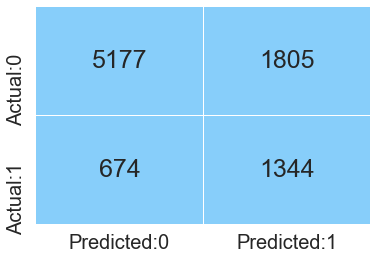

In [807]:
plot_confusion_matrix(rf_grid_model)

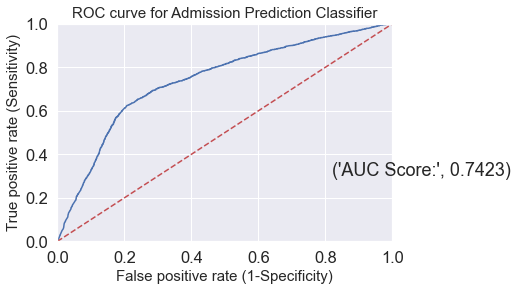

In [808]:
plot_roc(rf_grid_model)

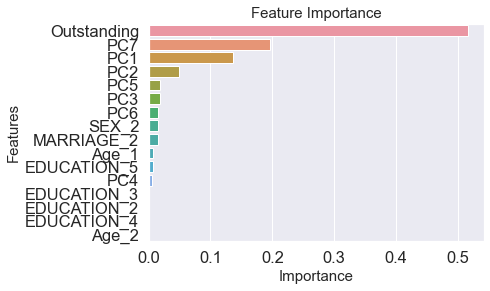

In [846]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the gini importance
important_features = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': rf_model1.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [857]:
#Score card
print(update_score_card(model=rf_grid_model,Name='Random forest after Hyperparameter tuning',xtest=xtest,xtrain=xtrain))


                                  Model_Name  AUC Score (test data)  \
0                 Decision Tree before SMOTE               0.587046   
1                  Decision Tree after SMOTE               0.588510   
2  Decision Tree after Hyperparameter-tuning               0.692036   
3                              Random forest               0.636768   
4  Random forest after Hyperparameter tuning               0.703742   

   Precision Score (test data)  Recall Score (test data)  \
0                          NaN                       NaN   
1                          NaN                       NaN   
2                          NaN                       NaN   
3                          NaN                       NaN   
4                          NaN                       NaN   

   Accuracy Score (test data)  Kappa Score (test data)  f1-score (test data)  \
0                    0.706667                      NaN                   NaN   
1                    0.654000                      N

##### d) KNN Model

In [737]:
#KNN 
# import various functions from sklearn 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
# instantiate the 'KNeighborsClassifier'
# n_neighnors: number of neighbors to consider
# default metric is minkowski, and with p=2 it is equivalent to the euclidean metric               #RD??s
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model = knn_classification.fit(xtrain, ytrain)

In [738]:
train_report =get_train_report(knn_model)
print(train_report)

              precision    recall  f1-score   support

           0       0.97      0.82      0.89     16382
           1       0.84      0.97      0.90     16382

    accuracy                           0.90     32764
   macro avg       0.91      0.90      0.90     32764
weighted avg       0.91      0.90      0.90     32764



In [739]:
test_report = get_test_report(knn_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.83      0.68      0.75      6982
           1       0.33      0.54      0.40      2018

    accuracy                           0.65      9000
   macro avg       0.58      0.61      0.58      9000
weighted avg       0.72      0.65      0.67      9000



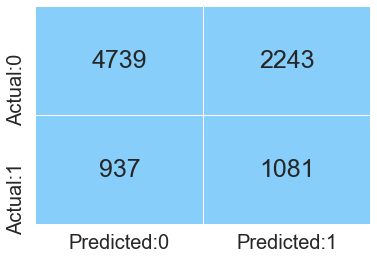

In [740]:
plot_confusion_matrix(knn_model)

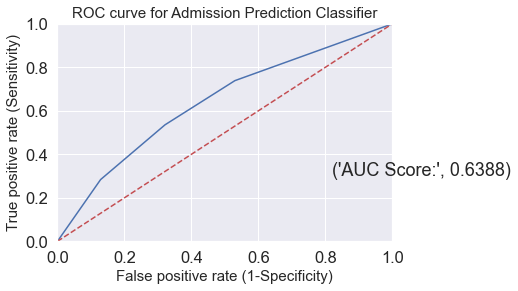

In [741]:
# call the function to plot the ROC curve
# pass the knn model to the function
plot_roc(knn_model)

In [858]:
#Score card
print(update_score_card(model=knn_model,Name='KNN Model',xtest=xtest,xtrain=xtrain))


                                  Model_Name  AUC Score (test data)  \
0                 Decision Tree before SMOTE               0.587046   
1                  Decision Tree after SMOTE               0.588510   
2  Decision Tree after Hyperparameter-tuning               0.692036   
3                              Random forest               0.636768   
4  Random forest after Hyperparameter tuning               0.703742   
5                                  KNN Model               0.607212   

   Precision Score (test data)  Recall Score (test data)  \
0                          NaN                       NaN   
1                          NaN                       NaN   
2                          NaN                       NaN   
3                          NaN                       NaN   
4                          NaN                       NaN   
5                          NaN                       NaN   

   Accuracy Score (test data)  Kappa Score (test data)  f1-score (test data)  \
0

##### hyperparameter tunning for KNN

In [796]:



# create a dictionary with hyperparameters and its values
# n_neighnors: number of neighbors to consider
# usually, we consider the odd value of 'n_neighnors' to avoid the equal number of nearest points with more than one class
# pass the different distance metrics to the parameter, 'metric'
tuned_paramaters = {'n_neighbors': np.arange(2, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
# instantiate the 'KNeighborsClassifier' 
knn_classification = KNeighborsClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the knn model
# param_grid: pass the dictionary with hyperparameters and its values
# cv: number of folds in k-fold i.e. here cv = 5
# scoring: pass the scoring parameter 'accuracy'
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

# fit the model on X_train and y_train using fit()
knn_grid.fit(xtrain, ytrain)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'manhattan', 'n_neighbors': 2} 



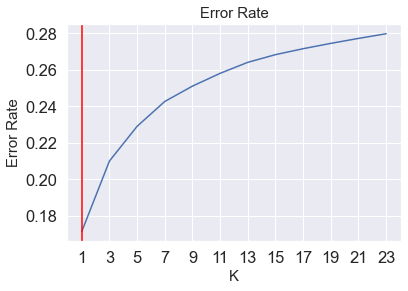

In [798]:


# consider an empty list to store error rate   #RD y??
error_rate = []
 
# use for loop to build a knn model for each K
for i in np.arange(1,25,2):
    
    # setup a knn classifier with k neighbors
    # use the 'euclidean' metric 
    knn = KNeighborsClassifier(i, metric = 'euclidean')
   
    # fit the model using 'cross_val_score'
    # pass the knn model as 'estimator'
    # use 5-fold cross validation
    score = cross_val_score(knn, xtrain, ytrain, cv = 5)
    
    # calculate the mean score
    score = score.mean()
    
    # compute error rate 
    error_rate.append(1 - score)

# plot the error_rate for different values of K 
plt.plot(range(1,25,2), error_rate)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Error Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

# set the x-axis labels
plt.xticks(np.arange(1, 25, step = 2))

# plot a vertical line across the minimum error rate
plt.axvline(x = 1, color = 'red')

# display the plot
plt.show()

In [801]:
#print the performance measures for test set for the model with best parameters
# call the function 'get_test_report'
# pass the knn model using GridSearch to the function
print('Classification Report for test set: \n', get_test_report(knn_grid))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      6982
           1       0.36      0.35      0.35      2018

    accuracy                           0.72      9000
   macro avg       0.59      0.58      0.59      9000
weighted avg       0.71      0.72      0.71      9000



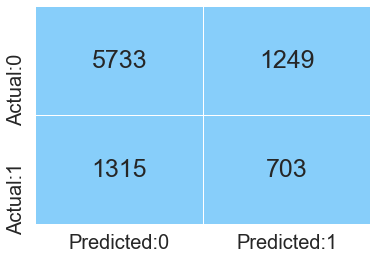

In [832]:
plot_confusion_matrix(knn_grid)

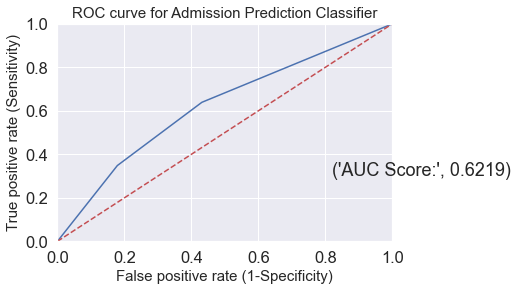

In [803]:
# call the function to plot the ROC curve
# pass the knn model to the function
plot_roc(knn_grid)

In [859]:
#Score card
print(update_score_card(model=knn_grid,Name='KNN Model with gridSearch',xtest=xtest,xtrain=xtrain))


                                  Model_Name  AUC Score (test data)  \
0                 Decision Tree before SMOTE               0.587046   
1                  Decision Tree after SMOTE               0.588510   
2  Decision Tree after Hyperparameter-tuning               0.692036   
3                              Random forest               0.636768   
4  Random forest after Hyperparameter tuning               0.703742   
5                                  KNN Model               0.607212   
6                  KNN Model with gridSearch               0.584738   

   Precision Score (test data)  Recall Score (test data)  \
0                          NaN                       NaN   
1                          NaN                       NaN   
2                          NaN                       NaN   
3                          NaN                       NaN   
4                          NaN                       NaN   
5                          NaN                       NaN   
6          

##### GaussianNB Model

In [743]:
# instantiate the 'GaussianNB'
gnb = GaussianNB()

# fit the model using fit() on train data
gnb_model = gnb.fit(xtrain, ytrain)

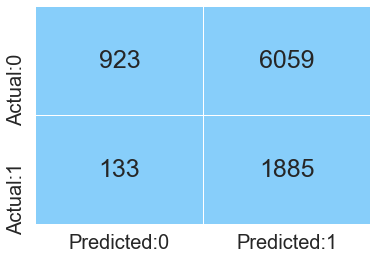

In [744]:
# call the function to plot the confusion matrix
# pass the gaussian naive bayes model to the function
plot_confusion_matrix(gnb_model)

In [745]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the gaussian naive bayes model to the function
test_report = get_test_report(gnb_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.87      0.13      0.23      6982
           1       0.24      0.93      0.38      2018

    accuracy                           0.31      9000
   macro avg       0.56      0.53      0.30      9000
weighted avg       0.73      0.31      0.26      9000



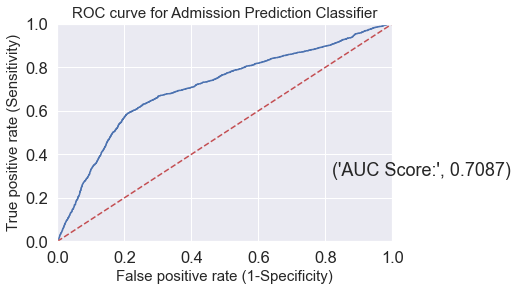

In [746]:
plot_roc(gnb_model)

In [860]:
#Score card
print(update_score_card(model=gnb_model,Name='GaussianNB Model',xtest=xtest,xtrain=xtrain))


                                  Model_Name  AUC Score (test data)  \
0                 Decision Tree before SMOTE               0.587046   
1                  Decision Tree after SMOTE               0.588510   
2  Decision Tree after Hyperparameter-tuning               0.692036   
3                              Random forest               0.636768   
4  Random forest after Hyperparameter tuning               0.703742   
5                                  KNN Model               0.607212   
6                  KNN Model with gridSearch               0.584738   
7                           GaussianNB Model               0.533145   

   Precision Score (test data)  Recall Score (test data)  \
0                          NaN                       NaN   
1                          NaN                       NaN   
2                          NaN                       NaN   
3                          NaN                       NaN   
4                          NaN                       NaN   


##### AdaBoost Model

In [748]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

# fit the model using fit() on train data
ada_model.fit(xtrain, ytrain)

AdaBoostClassifier(n_estimators=40, random_state=10)

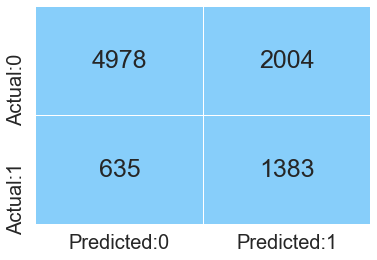

In [749]:
plot_confusion_matrix(ada_model)

In [750]:
test_report = get_test_report(ada_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      6982
           1       0.41      0.69      0.51      2018

    accuracy                           0.71      9000
   macro avg       0.65      0.70      0.65      9000
weighted avg       0.78      0.71      0.73      9000



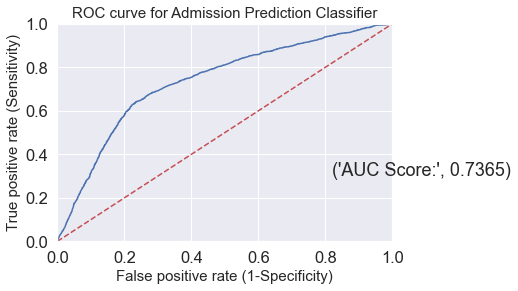

In [751]:
plot_roc(ada_model)

In [861]:
#Score card
print(update_score_card(model=ada_model,Name='AdaBoost Model',xtest=xtest,xtrain=xtrain))


                                  Model_Name  AUC Score (test data)  \
0                 Decision Tree before SMOTE               0.587046   
1                  Decision Tree after SMOTE               0.588510   
2  Decision Tree after Hyperparameter-tuning               0.692036   
3                              Random forest               0.636768   
4  Random forest after Hyperparameter tuning               0.703742   
5                                  KNN Model               0.607212   
6                  KNN Model with gridSearch               0.584738   
7                           GaussianNB Model               0.533145   
8                             AdaBoost Model               0.699154   

   Precision Score (test data)  Recall Score (test data)  \
0                          NaN                       NaN   
1                          NaN                       NaN   
2                          NaN                       NaN   
3                          NaN                   

##### GradientBoost model

In [752]:
# instantiate the 'GradientBoostingClassifier' 
# n_estimators: number of estimators to consider
# 'max_depth': assigns maximum depth of the tree
# pass the 'random_state' to obtain the same results for each code implementation
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(xtrain, ytrain)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

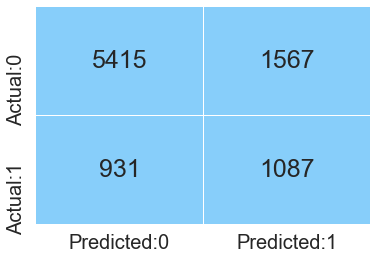

In [753]:
plot_confusion_matrix(gboost_model)

In [754]:
test_report = get_test_report(gboost_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      6982
           1       0.41      0.54      0.47      2018

    accuracy                           0.72      9000
   macro avg       0.63      0.66      0.64      9000
weighted avg       0.75      0.72      0.73      9000



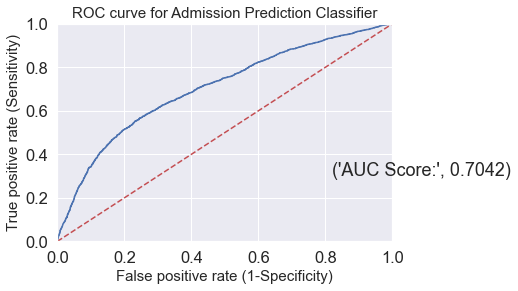

In [755]:
plot_roc(gboost_model)

In [862]:
#Score card
update_score_card(model=gboost_model,Name='GradientBoost model',xtest=xtest,xtrain=xtrain)


                                  Model_Name  AUC Score (test data)  \
0                 Decision Tree before SMOTE               0.587046   
1                  Decision Tree after SMOTE               0.588510   
2  Decision Tree after Hyperparameter-tuning               0.692036   
3                              Random forest               0.636768   
4  Random forest after Hyperparameter tuning               0.703742   
5                                  KNN Model               0.607212   
6                  KNN Model with gridSearch               0.584738   
7                           GaussianNB Model               0.533145   
8                             AdaBoost Model               0.699154   
9                        GradientBoost model               0.657109   

   Precision Score (test data)  Recall Score (test data)  \
0                          NaN                       NaN   
1                          NaN                       NaN   
2                          NaN        

##### XGBoost Model

In [830]:
# instantiate the 'XGBClassifier'
# set the maximum depth of the tree using the parameter, 'max_depth'
# pass the value of minimum loss reduction required for partition of the leaf node to the parameter, 'gamma'
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(xtrain, ytrain)

[19:15:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

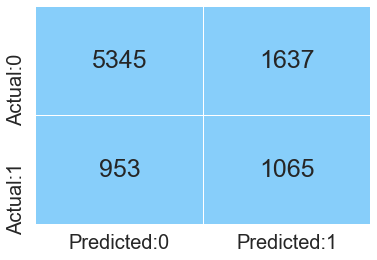

In [757]:
plot_confusion_matrix(xgb_model)

In [837]:
train_report = get_train_report(xgb_model)
print("Train")
# print the performance measures
print(train_report)

Train
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     16382
           1       0.96      0.98      0.97     16382

    accuracy                           0.97     32764
   macro avg       0.97      0.97      0.97     32764
weighted avg       0.97      0.97      0.97     32764



In [758]:
test_report = get_test_report(xgb_model)
print("Test")
# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.85      0.77      0.80      6982
           1       0.39      0.53      0.45      2018

    accuracy                           0.71      9000
   macro avg       0.62      0.65      0.63      9000
weighted avg       0.75      0.71      0.73      9000



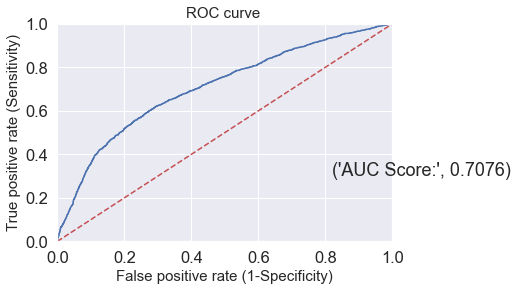

In [851]:
plot_roc(xgb_model)

In [863]:
#Score card
update_score_card(model=xgb_model,Name='XGBoost model',xtest=xtest,xtrain=xtrain)


                                   Model_Name  AUC Score (test data)  \
0                  Decision Tree before SMOTE               0.587046   
1                   Decision Tree after SMOTE               0.588510   
2   Decision Tree after Hyperparameter-tuning               0.692036   
3                               Random forest               0.636768   
4   Random forest after Hyperparameter tuning               0.703742   
5                                   KNN Model               0.607212   
6                   KNN Model with gridSearch               0.584738   
7                            GaussianNB Model               0.533145   
8                              AdaBoost Model               0.699154   
9                         GradientBoost model               0.657109   
10                              XGBoost model               0.660855   

    Precision Score (test data)  Recall Score (test data)  \
0                           NaN                       NaN   
1            

##### hyperparameter tuning for XGB.

In [761]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

# instantiate the 'XGBClassifier' 
xgb_model = XGBClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
xgb_grid.fit(xtrain, ytrain)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

[12:19:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:19:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:19:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:19:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:20:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:20:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:21:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:21:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:22:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:22:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:23:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:24:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:24:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:25:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:26:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:26:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:26:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:26:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:26:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:26:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:26:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:26:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:27:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:27:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:27:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:27:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:28:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:28:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:28:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:28:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:28:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:28:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:28:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:28:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:29:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:29:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:29:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:29:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:30:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:30:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:30:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:30:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:30:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:30:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:30:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:30:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:31:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:31:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:31:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:31:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:32:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:32:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:32:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:32:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:32:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:32:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:33:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:33:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:33:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:33:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:33:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:33:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:34:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:34:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:34:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:34:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:34:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:35:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:35:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:35:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [847]:
# instantiate the 'XGBClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))

# use fit() to fit the model on the train set
xgb_model = xgb_grid_model.fit(xtrain, ytrain)

# print the performance measures for test set for the model with best parameters
print('Classification Report for train set:\n', get_train_report(xgb_model))
print('Classification Report for test set:\n', get_test_report(xgb_model))

[20:28:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report for train set:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91     16382
           1       0.90      0.93      0.91     16382

    accuracy                           0.91     32764
   macro avg       0.91      0.91      0.91     32764
weighted avg       0.91      0.91      0.91     32764

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.86      0.76      0.81      6982
           1       0.40      0.56      0.47      2018

    accuracy                           0.72      9000
   macro avg       0.63      0.66      0.64      9000
weighted avg    

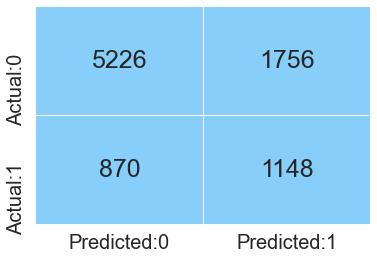

In [532]:
plot_confusion_matrix(xgb_grid)

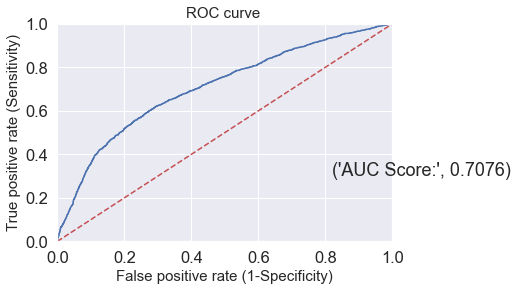

In [850]:
plot_roc(xgb_grid)

In [864]:
#Score card
update_score_card(model=xgb_grid,Name='XGBoost model after GridSearch',xtest=xtest,xtrain=xtrain)


                                   Model_Name  AUC Score (test data)  \
0                  Decision Tree before SMOTE               0.587046   
1                   Decision Tree after SMOTE               0.588510   
2   Decision Tree after Hyperparameter-tuning               0.692036   
3                               Random forest               0.636768   
4   Random forest after Hyperparameter tuning               0.703742   
5                                   KNN Model               0.607212   
6                   KNN Model with gridSearch               0.584738   
7                            GaussianNB Model               0.533145   
8                              AdaBoost Model               0.699154   
9                         GradientBoost model               0.657109   
10                              XGBoost model               0.660855   
11             XGBoost model after GridSearch               0.660855   

    Precision Score (test data)  Recall Score (test data)  \
0 

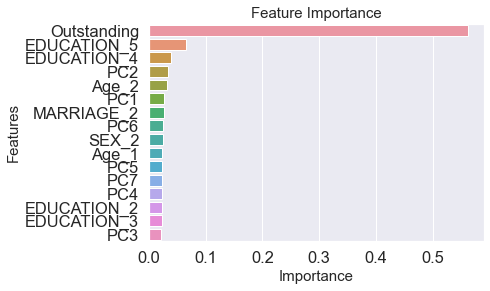

In [534]:
important_features = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': xgb_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

##### Generalized Score card function

In [852]:
# create an empty dataframe to store the scores for various algorithms      #RD
ScoreCard1 = pd.DataFrame(columns=['Model_Name' ,'AUC Score (test data)', 'Precision Score (test data)', 'Recall Score (test data)','Accuracy Score (test data)', 'Kappa Score (test data)', 'f1-score (test data)','AUC Score (Train data)', 'Precision Score (Train data)', 'Recall Score (Train data)Accuracy Score (Train data)', 'Kappa Score (Train data)', 'f1-score (Train data)'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model,Name,xtest,xtrain):
    
    # let 'y_pred_prob' be the predicted values of y
    ##y_pred_prob = logreg.predict(xtest)                    #RD

    # convert probabilities to 0 and 1 using 'if_else'
    ##y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    y_pred=model.predict(xtest)
    y_train_pred=model.predict(xtrain)
    name=Name
    # assign 'score_card' as global variable
    global ScoreCard1

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    '''score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)'''
    ScoreCard1 = ScoreCard1.append({'Model_Name':name,
                                  'AUC Score (test data)' : metrics.roc_auc_score(ytest, y_pred),
                                  'Precision Score(test data)': metrics.precision_score(ytest, y_pred),
                                  'Recall Score(test data)': metrics.recall_score(ytest, y_pred),
                                  'Accuracy Score (test data)': metrics.accuracy_score(ytest, y_pred),
                                  'Kappa Score(test data)':metrics.cohen_kappa_score(ytest, y_pred),
                                  'f1-score(test data)': metrics.f1_score(ytest, y_pred), 
                                  'AUC Score (Train data)' : metrics.roc_auc_score(ytrain, y_train_pred),
                                  'Precision Score(Train data)': metrics.precision_score(ytrain, y_train_pred),
                                  'Recall Score(Train data)': metrics.recall_score(ytrain, y_train_pred),
                                  'Accuracy Score (Train data)': metrics.accuracy_score(ytrain, y_train_pred),
                                  'Kappa Score(Train data)':metrics.cohen_kappa_score(ytrain, y_train_pred),
                                  'f1-score(Train data)': metrics.f1_score(ytrain, y_train_pred)}, 
                                  ignore_index = True)
    
    
    
    print(ScoreCard1)

In [865]:
ScoreCard.iloc[:,[0,1,4,7,10,13,14,15,16,17,18,19,20]]

,Model_Name,AUC Score (test data),Accuracy Score (test data),AUC Score (Train data),Accuracy Score (Train data),Kappa Score(Train data),Kappa Score(test data),Precision Score(Train data),Precision Score(test data),Recall Score(Train data),Recall Score(test data),f1-score(Train data),f1-score(test data)
0,Decision Tree before SMOTE,0.587046,0.706667,0.833781,0.833781,0.667562,0.171138,0.998814,0.353025,0.668356,0.370168,0.800834,0.361393
1,Decision Tree after SMOTE,0.588510,0.654000,0.998016,0.998016,0.996032,0.151095,0.999082,0.316845,0.996948,0.469772,0.998014,0.378443
2,Decision Tree after Hyperparameter-tuning,0.692036,0.744111,0.695581,0.695581,0.391161,0.343041,0.739498,0.447164,0.603895,0.597621,0.664852,0.511559
3,Random forest,0.636768,0.734889,0.990264,0.990264,0.980527,0.264137,0.994094,0.417117,0.986387,0.458870,0.990226,0.436999
4,Random forest after Hyperparameter tuning,0.703742,0.724556,0.699762,0.699762,0.399524,0.339787,0.718794,0.426802,0.656269,0.666006,0.686110,0.520225
5,KNN Model,0.607212,0.646667,0.896075,0.896075,0.792150,0.174320,0.843689,0.325211,0.972287,0.535679,0.903434,0.404717
6,KNN Model with gridSearch,0.584738,0.715111,0.968929,0.968929,0.937859,0.171470,0.999545,0.360143,0.938286,0.348365,0.967947,0.354156
7,GaussianNB Model,0.533145,0.312000,0.542180,0.542180,0.084361,0.032433,0.523417,0.237286,0.942803,0.934093,0.673131,0.378438
8,AdaBoost Model,0.699154,0.706778,0.691338,0.691338,0.382676,0.320916,0.703077,0.408326,0.662434,0.685332,0.682151,0.511748
9,GradientBoost model,0.657109,0.722444,0.967800,0.967800,0.935600,0.282561,0.959911,0.409570,0.976377,0.538652,0.968074,0.465325


In [ ]:
ReportCard=pd.DataFrame(columns=['Model_Name' ,'AUC Score (test data)', 'Precision Score (test data)', 'Recall Score (test data)',
                                       'Accuracy Score (test data)', 'Kappa Score (test data)', 'f1-score (test data)','AUC Score (Train data)', 'Precision Score (Train data)', 'Recall Score (Train data)',
                                       'Accuracy Score (Train data)', 'Kappa Score (Train data)', 'f1-score (Train data)'])
